# Project 1: SAT & ACT Analysis



## Problem Statement

Though standardized tests such as **American College Testing (ACT)** and **Standardised Aptitude Tests (SAT)** are considered by a number of states as a prerequisite for higher education enrolment in the universities in United States, according to recent statistics produced by National Center for Fair and Open Testing (Fair Test) – a non-profit civil society group – more than a 1,000 four-year colleges and universities in the US have discontinued the practise of mandatory SAT or ACT scores for student admissions. These colleges and universities are spread across the US and now include some of the top institutions such as the University of Chicago. 

**Given this increasing trend against standardised exams, what measures should be taken to increase the total participation of high school students in ACT or SAT?**

## Executive Summary

This project investigates the data on participation rates and average scores for students taking the SAT and ACT exams in all US states. The data contains participation rates and total/composite and section scores for the year 2017 and 2018. Since the data is organised state-wise, it allows for state-to-state comparison of participation rates and scores for each tests. 

Broad observation of dataset reveals the following trends:

- Many states in the US mandate taking either SAT or ACT as a requirement for high school graduation. Currently, a total of 16  states have made ACT mandatory for high school graduation, 9 states have SAT as the basic requirement for high school graduation and 2 states mandate students to either take SAT or ACT tests before graduating high school. These states also have the highest participation of students in SAT or ACT exams depending upon the mandated exam set by the state. State policy is a major factor in students participation. 

- Very few students choose to take both the tests. There is a negative correlation between participation rates for SAT and ACT exams. 

- There is also a negative correlation between participation rate and average scores for both the exams. Higher the number of students taking the tests; lower are the average scores or vice-versa. 

- This negative correlation can be explained by the fact that higher participation rates are often a result of state policy and making these exams mandatory creates a compulsion among non-interested students to give the tests. 

- Tests not mandated by the states are taken by a fewer number of students. High average scores indicate both greater motivation and greater preparation by these students. 


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline 

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
act_2017.shape

(52, 7)

In [6]:
sat_2017.shape

(51, 5)

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer**: The datasets provided are for the general aptitude tests, namely SAT and ACT, conducted for admissions in universities/colleges in the United States. The datasets for SAT and ACT are for each state in the US and span over two years, from 2017 to 2018. 

**SAT dataset** consists of 4 variables: participation rate, average math score, evidence-based reading and writing scores, and total average score. The participation rate variable is in percentage and the remaining variables in the dataset are integers. There are 51 rows and 5 columns in SAT 2017 and 2018 dataset.  

**ACT dataset** consists of 6 variables: participation rate, average emglish score, average math score, average science score, average reading score, and average composite scores. The participation rate variable is in percentage whereas the other variables are float(or decimal). ACT (2017 and 2018) datasets have 52 rows and 7 columns. These datasets have an additional row that provides score information at the national level. 


#### 4a. Does the data look complete? 

**Answer**: Yes, the data look complete for both SAT and ACT for the two years. Every dataset contains information about the scores in all 50 US states. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer**: There were some issues with the data type of some variables such as participation rate. To make the dataset consistent, the participation variable was changed to the data type - integer in SAT datasets and to a float in ACT datasets. 

The maximum possible score on a SAT test is 1600 and to score this, one needs to have a perfect score of 800 in each subsets of the test, namely, Math and Evidence-based Reading and Writing Score. The minimum possible value is 400 for composite score and 200 on each of the sections. 

The maximum possible score on an ACT test is 36. For each of the sections - reading, math, english and science, the scores are in the range of 1-36. The minimum possible composite score on ACT test is 1. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**Answer**: I fixed the type error in Composite column in act_2017 file and also another type error in the sat_2017 file. 

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**: Most of the variables in the dataset are of the correct and expected data type such as State which is an object (string) and participation rate (given it is in percentage is a string). However, in the act (2017) dataset, the average composite score is an object given that it is the average of all subject scores. This seems a little odd.  

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
#Using the replace command to change % to '' and then changing the data type to float by using astype function
act_2017['Participation']=act_2017['Participation'].str.replace('%','').astype(float)

In [11]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
act_2017.at[51,'Composite']=20.2

In [13]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [14]:
act_2017['Composite']=act_2017.Composite.astype(float)

In [15]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [16]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [17]:
#to check the data types of ACT 2017
act_2017.infer_objects()
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [18]:
#Replacing the % sign in participation rate and changing the data type
sat_2017['Participation']=sat_2017['Participation'].str.replace('%','').astype(float)

In [19]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [20]:
sat_2017['Participation'][:5]

0     5.0
1    38.0
2    30.0
3     3.0
4    53.0
Name: Participation, dtype: float64

- Display the data types again to confirm they are correct.

In [21]:
#to check the data types of SAT 2017
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#code (only unique feature is the state in all the dataframes)
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [23]:
#Renaming the columns
sat_2017.rename(columns={'State':'state', 'Participation':'percent_of_students_taking_SAT_2017', 
                         'Evidence-Based Reading and Writing': 'SAT_average_reading_and_writing_score_2017',
                         'Math': 'SAT_average_math_score_2017', 'Total': 'SAT_total_average_score_2017'}, inplace=True)

In [24]:
#Checking the columns if renamed properly
sat_2017.columns

Index(['state', 'percent_of_students_taking_SAT_2017',
       'SAT_average_reading_and_writing_score_2017',
       'SAT_average_math_score_2017', 'SAT_total_average_score_2017'],
      dtype='object')

In [25]:
sat_2017.head()

,state,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [27]:
#Renaming the columns for ACT 2017
act_2017.rename(columns={'State':'state','Participation':'percent_of_students_taking_ACT_2017',
                        'English':'ACT_average_english_score_2017', 
                         'Math':'ACT_average_math_score_2017',
                        'Reading':'ACT_average_reading_score_2017', 
                         'Science':'ACT_average_science_score_2017', 
                         'Composite':'ACT_total_average_score_2017'}, inplace=True)

In [28]:
act_2017.columns

Index(['state', 'percent_of_students_taking_ACT_2017',
       'ACT_average_english_score_2017', 'ACT_average_math_score_2017',
       'ACT_average_reading_score_2017', 'ACT_average_science_score_2017',
       'ACT_total_average_score_2017'],
      dtype='object')

In [29]:
act_2017.head()

,state,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Variable|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT (2017, 2018), ACT (2017, 2018)|Name of the state|
|percent_of_students_taking_SAT_2017|float|SAT 2017|Percentage of the total high school graduates in each state who took the SAT test in a given year|	
|SAT_average_reading_and_writing_score_2017|integer|SAT 2017|Average of the scores of all the test takers on the Evidence-based Reading and Writing section of the test for each state in a given year| 
|SAT_average_math_score_2017|integer|SAT 2017|Average of the scores of all the test takers on the Math section of the test for each state in a given year| 
|SAT_total_average_score_2017|integer|SAT 2017|Total average scores of all the test takers for each state in a given year| 	
|percent_of_students_taking_ACT_2017|float|ACT 2017|Percentage of the total high school graduates in each state who took the ACT test in a given year| 	
|ACT_average_english_score_2017|float|ACT 2017|Average of the scores of all the test takers on the English section of the test for each state in a given year| 	
|ACT_average_math_score_2017|float|ACT 2017|Average of the scores of all the test takers on the Math section of the test for each state in a given year| 
|ACT_average_reading_score_2017|float|ACT 2017|Average of the scores of all the test takers on the Reading section of the test for each state in a given year| 	
|ACT_average_science_score_2017|float|ACT 2017|Average of the scores of all the test takers on the Science section of the test for each state in a given year| 	
|ACT_total_average_score_2017|float|ACT 2017|Total average scores of all the test takers for each state in a given year| 	
|percent_of_students_taking_SAT_2018|float|SAT 2018|Percentage of the total high school graduates in each state who took the SAT test in a given year| 	
|SAT_average_reading_and_writing_score_2018|integer|SAT 2018|Average of the scores of all the test takers on the Evidence-based Reading and Writing section of the test for each state in a given year| 	
|SAT_average_math_score_2018|integer|SAT 2018|Average of the scores of all the test takers on the Math section of the test for each state in a given year| 	
|SAT_total_average_score_2018|integer|SAT 2018|Total average scores of all the test takers for each state in a given year| 	
|percent_of_students_taking_ACT_2018|float|ACT 2018|Percentage of the total high school graduates in each state who took the ACT test in a given year| 	
|ACT_total_average_score_2018|float|ACT 2018|Total average scores of all the test takers for each state in a given year| 	
|ACT_average_english_score_2018|float|ACT 2018|Average of the scores of all the test takers on the English section of the test for each state in a given year| 	
|ACT_average_math_score_2018|float|ACT 2018|Average of the scores of all the test takers on the Math section of the test for each state in a given year| 
|ACT_average_reading_score_2018|float|ACT 2018|Average of the scores of all the test takers on the Reading section of the test for each state in a given year| 	
|ACT_average_science_score_2018|float|ACT 2018|Average of the scores of all the test takers on the Science section of the test for each state in a given year| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
#Dropped the national column which was extra in the ACT dataset
act_2017.drop(act_2017.index[0]).head()

,state,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [31]:
act_2017.drop(act_2017.index[0]).shape

(51, 7)

In [32]:
sat_2017.shape

(51, 5)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Merging files ACT and SAT 2017:
act_sat_2017_merge = pd.merge(sat_2017, act_2017, on='state')
act_sat_2017_merge.head()

,state,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#Saving the merged file 
act_sat_2017_merge.to_csv('data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [35]:
#percentage of students taking the test is same as participation in the datasets of act-2017 and act-2018-updated

#read the csv files for act and sat 2018 into pandas
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018_updated.csv')

In [36]:
#seeing the top five rows of the dataset
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [37]:
#seeing the top 5 rows of the dataset
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [38]:
#checking the data types of ACT 2018 variables
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [39]:
#replacing the percentage symbol with space in participation in the two datasets
sat_2018['Participation']=sat_2018['Participation'].str.replace('%','').astype(float)

In [40]:
#checking the data types of the datasets
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [41]:
#change the data type of participation in act 2018 to a float
act_2018['Percentage of Students Tested']=act_2018['Percentage of Students Tested'].astype(float)

In [42]:
#confirming that the data type has changed
act_2018.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [43]:
#finding the dimension of the two datasets
sat_2018.shape

(51, 5)

In [44]:
act_2018.shape

(51, 7)

In [45]:
#rename the columns
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [46]:
act_2018.rename(columns={'State':'state','Percentage of Students Tested':'percent_of_students_taking_ACT_2018',
                        'Average English Score':'ACT_average_english_score_2018', 
                         'Average Math Score':'ACT_average_math_score_2018',
                        'Average Reading Score':'ACT_average_reading_score_2018', 
                         'Average Science Score':'ACT_average_science_score_2018', 
                         'Average Composite Score':'ACT_total_average_score_2018'}, inplace=True)

In [47]:
act_2018.head()

,state,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [48]:
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [49]:
#renaming the columns for SAT 2018
sat_2018.rename(columns={'State':'state', 'Participation':'percent_of_students_taking_SAT_2018', 
                         'Evidence-Based Reading and Writing': 'SAT_average_reading_and_writing_score_2018',
                         'Math': 'SAT_average_math_score_2018', 'Total': 'SAT_total_average_score_2018'}, inplace=True)

In [50]:
sat_2018.head()

,state,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [51]:
#merging the 2017 and 2018 datasets on state as it is a common variable 
act_sat_2018_merge = pd.merge(sat_2018, act_2018, on='state')
act_sat_2018_merge.head()

,state,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [52]:
#exporting the merged file as csv and saving as combined_2018.csv
act_sat_2018_merge.to_csv('data/combined_2018.csv', index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [53]:
#combining 2017 and 2018 data into a single dataframe
combined_2017_2018_merge = pd.merge(act_sat_2017_merge, act_sat_2018_merge, on='state')
combined_2017_2018_merge.head()

,state,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,...,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [54]:
#saving the merged file as final.csv 
combined_2017_2018_merge.to_csv('data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
#read the final file into pandas
final = pd.read_csv('data/final.csv')

In [56]:
#Code:
final_new = final.describe()
final_new

,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [57]:
#another way to transpose
#final.describe().T 

In [58]:
#transposing the rows and columns of the final dataframe
final_new.transpose()

,count,mean,std,min,25%,50%,75%,max
percent_of_students_taking_SAT_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
SAT_average_reading_and_writing_score_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
SAT_average_math_score_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
SAT_total_average_score_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
percent_of_students_taking_ACT_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT_average_english_score_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT_average_math_score_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT_average_reading_score_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT_average_science_score_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
ACT_total_average_score_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [59]:
def standard_dev(nums):
    differences=0
    avg=sum(nums)/len(nums)
    for num in nums:
        differences+=(num-avg)**(2)
    return (differences/len(nums))**(0.5)
#print(value=(differences/len(nums))**(0.5))

In [60]:
standard_dev(final['SAT_average_math_score_2017'])

46.65713364485503

In [61]:
np.std(final['SAT_average_math_score_2017'])

46.65713364485503

In [62]:
#using pandas std to calculate standard deviation for one specific column

final['SAT_average_math_score_2017'].std()

47.12139516560329

In [63]:
#using numpy std method to calculate the standard deviation of all columns in the dataframe
#by default it is calculated column-wise
final.std()

percent_of_students_taking_SAT_2017           35.276632
SAT_average_reading_and_writing_score_2017    45.666901
SAT_average_math_score_2017                   47.121395
SAT_total_average_score_2017                  92.494812
percent_of_students_taking_ACT_2017           32.140842
ACT_average_english_score_2017                 2.353677
ACT_average_math_score_2017                    1.981989
ACT_average_reading_score_2017                 2.067271
ACT_average_science_score_2017                 1.739353
ACT_total_average_score_2017                   2.020695
percent_of_students_taking_SAT_2018           37.314256
SAT_average_reading_and_writing_score_2018    47.502627
SAT_average_math_score_2018                   47.772623
SAT_total_average_score_2018                  94.155083
percent_of_students_taking_ACT_2018           34.080976
ACT_total_average_score_2018                   2.106278
ACT_average_english_score_2018                 2.446356
ACT_average_math_score_2018                    2

In [64]:
final.describe()

,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
#applying standard deviation function to each numeric column
{col.name:standard_dev(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float') or (final[i].dtype=='int')]}

{'percent_of_students_taking_SAT_2017': 34.92907076664508,
 'SAT_average_reading_and_writing_score_2017': 45.21697020437866,
 'SAT_average_math_score_2017': 46.65713364485503,
 'SAT_total_average_score_2017': 91.58351056778743,
 'percent_of_students_taking_ACT_2017': 31.824175751231806,
 'ACT_average_english_score_2017': 2.3304876369363363,
 'ACT_average_math_score_2017': 1.9624620273436781,
 'ACT_average_reading_score_2017': 2.0469029314842646,
 'ACT_average_science_score_2017': 1.7222161451443676,
 'ACT_total_average_score_2017': 2.000786081581989,
 'percent_of_students_taking_SAT_2018': 36.946619223539415,
 'SAT_average_reading_and_writing_score_2018': 47.03460978357609,
 'SAT_average_math_score_2018': 47.30194550378352,
 'SAT_total_average_score_2018': 93.22742384464433,
 'percent_of_students_taking_ACT_2018': 33.745194881997506,
 'ACT_total_average_score_2018': 2.0855261815801147,
 'ACT_average_english_score_2018': 2.4222536143202795,
 'ACT_average_math_score_2018': 2.015707255555

In [66]:
#[cols for cols in [final[i] for i in final.columns if (final[i].dtype=='float') or (final[i].dtype=='int')]] 
#(just gives the column names and the values associated)

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

No, the manually calculated standard deviations did not match exactly with the output from pandas describe. However, the standard deviation from numpy's method matched exactly with the manually calculated standard deviation. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**SAT 2017 states with**:
Highest participation rate: Connecticut, Delaware, District of Columbia, Michigan
Lowest participation rate: Iowa, Mississippi, North Dakota

**SAT 2018 states with**:
Highest participation rate: Colorado, Connecticut, Delaware, Idaho, Michigan 
Lowest participation rate: North Dakota

**ACT 2017 states with**:
Highest participation rate: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming
Lowest participation rate: Maine

**ACT 2018 states with**:
Highest participation rate: Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming 
Lowest participation rate: Maine

**SAT 2017 states with**:
Highest mean total scores: Minnesota
Lowest mean total scores: District of Columbia

**SAT 2018 states with**:
Highest mean total scores: Minnesota
Lowest mean total scores: District of Columbia

**ACT 2017 states with**:
Highest mean total scores: New Hampshire
Lowest mean total scores: Nevada

**ACT 2018 states with**:
Highest mean total scores: Connecticut
Lowest mean total scores: Nevada

In [67]:
#to see the 10 largest scores ACT 2017
final.nlargest(10,['ACT_total_average_score_2017'])['ACT_total_average_score_2017']

29    25.5
21    25.4
6     25.2
19    24.3
8     24.2
32    24.2
7     24.1
22    24.1
39    24.0
30    23.9
Name: ACT_total_average_score_2017, dtype: float64

In [68]:
#filtering max and min of the total average score for the two tests
final[final['ACT_total_average_score_2018']==final['ACT_total_average_score_2018'].max()]['state']

6    Connecticut
Name: state, dtype: object

In [69]:
final[final['ACT_total_average_score_2017']==final['ACT_total_average_score_2017'].max()]['state']

29    New Hampshire
Name: state, dtype: object

In [70]:
final[final['ACT_total_average_score_2018']==final['ACT_total_average_score_2018'].min()]['state']

28    Nevada
Name: state, dtype: object

In [71]:
final[final['ACT_total_average_score_2017']==final['ACT_total_average_score_2017'].min()]['state']

28    Nevada
Name: state, dtype: object

In [72]:
final[final['SAT_total_average_score_2018']==final['SAT_total_average_score_2018'].max()]['state']

23    Minnesota
Name: state, dtype: object

In [73]:
final[final['SAT_total_average_score_2017']==final['SAT_total_average_score_2017'].max()]['state']

23    Minnesota
Name: state, dtype: object

In [74]:
final[final['SAT_total_average_score_2018']==final['SAT_total_average_score_2018'].min()]['state']

8    District of Columbia
Name: state, dtype: object

In [75]:
final[final['SAT_total_average_score_2017']==final['SAT_total_average_score_2017'].min()]['state']

8    District of Columbia
Name: state, dtype: object

In [76]:
#filtering max and min of the participation rate for the two tests
final[final['percent_of_students_taking_SAT_2017']==final['percent_of_students_taking_SAT_2017'].max()]['state']

6              Connecticut
7                 Delaware
8     District of Columbia
22                Michigan
Name: state, dtype: object

In [77]:
final[final['percent_of_students_taking_SAT_2017']==final['percent_of_students_taking_SAT_2017'].min()]['state']

15            Iowa
24     Mississippi
34    North Dakota
Name: state, dtype: object

In [78]:
final[final['percent_of_students_taking_SAT_2018']==final['percent_of_students_taking_SAT_2018'].max()]['state']

5        Colorado
6     Connecticut
7        Delaware
12          Idaho
22       Michigan
Name: state, dtype: object

In [79]:
final[final['percent_of_students_taking_SAT_2018']==final['percent_of_students_taking_SAT_2018'].min()]['state']

34    North Dakota
Name: state, dtype: object

In [80]:
final[final['percent_of_students_taking_ACT_2018']==final['percent_of_students_taking_ACT_2018'].max()]['state']

0            Alabama
3           Arkansas
17          Kentucky
18         Louisiana
24       Mississippi
25          Missouri
26           Montana
27          Nebraska
28            Nevada
33    North Carolina
35              Ohio
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [81]:
final[final['percent_of_students_taking_ACT_2018']==final['percent_of_students_taking_ACT_2018'].min()]['state']

19    Maine
Name: state, dtype: object

In [82]:
final[final['percent_of_students_taking_ACT_2017']==final['percent_of_students_taking_ACT_2017'].max()]['state']

0            Alabama
3           Arkansas
5           Colorado
17          Kentucky
18         Louisiana
23         Minnesota
24       Mississippi
25          Missouri
26           Montana
28            Nevada
33    North Carolina
36          Oklahoma
40    South Carolina
42         Tennessee
44              Utah
49         Wisconsin
50           Wyoming
Name: state, dtype: object

In [83]:
final[final['percent_of_students_taking_ACT_2017']==final['percent_of_students_taking_ACT_2017'].min()]['state']

19    Maine
Name: state, dtype: object

In [84]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# SAT 2017-2018
final[(final['percent_of_students_taking_SAT_2017'] == 100) | (final['percent_of_students_taking_SAT_2018'] == 100)][['state','percent_of_students_taking_SAT_2017','percent_of_students_taking_SAT_2018']]

,state,percent_of_students_taking_SAT_2017,percent_of_students_taking_SAT_2018
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


**Answer**: Colorado, District of Columbia, Idaho

In [85]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# ACT 2017-18
final[(final['percent_of_students_taking_ACT_2017'] == 100) | (final['percent_of_students_taking_ACT_2018'] == 100)][['state','percent_of_students_taking_ACT_2017','percent_of_students_taking_ACT_2018']]

,state,percent_of_students_taking_ACT_2017,percent_of_students_taking_ACT_2018
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
23,Minnesota,100.0,99.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0
26,Montana,100.0,100.0
27,Nebraska,84.0,100.0


**Answer**: Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

In [86]:
#filtering states that have >50% participation on both tests in either year
final[((final['percent_of_students_taking_ACT_2017'] > 50) & (final['percent_of_students_taking_SAT_2017'] > 50)) | 
         ((final['percent_of_students_taking_ACT_2018'] > 50) & (final['percent_of_students_taking_SAT_2018'] > 50))][['state','percent_of_students_taking_ACT_2017','percent_of_students_taking_SAT_2017','percent_of_students_taking_ACT_2018','percent_of_students_taking_SAT_2018' ]]

,state,percent_of_students_taking_ACT_2017,percent_of_students_taking_SAT_2017,percent_of_students_taking_ACT_2018,percent_of_students_taking_SAT_2018
9,Florida,73.0,83.0,66.0,56.0
10,Georgia,55.0,61.0,53.0,70.0
11,Hawaii,90.0,55.0,89.0,56.0
33,North Carolina,100.0,49.0,100.0,52.0
40,South Carolina,100.0,50.0,100.0,55.0


In [87]:
final.head(52)[['state', 'percent_of_students_taking_SAT_2017','percent_of_students_taking_SAT_2018','percent_of_students_taking_ACT_2017','percent_of_students_taking_ACT_2018' ]]

,state,percent_of_students_taking_SAT_2017,percent_of_students_taking_SAT_2018,percent_of_students_taking_ACT_2017,percent_of_students_taking_ACT_2018
0,Alabama,5.0,6.0,100.0,100.0
1,Alaska,38.0,43.0,65.0,33.0
2,Arizona,30.0,29.0,62.0,66.0
3,Arkansas,3.0,5.0,100.0,100.0
4,California,53.0,60.0,31.0,27.0
5,Colorado,11.0,100.0,100.0,30.0
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
8,District of Columbia,100.0,92.0,32.0,32.0
9,Florida,83.0,56.0,73.0,66.0


**Answer**: Florida, Georgia, Hawaii, North Carolina, South Carolina 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [88]:
#finding correlation for the entire dataframe
final.corr()

,percent_of_students_taking_SAT_2017,SAT_average_reading_and_writing_score_2017,SAT_average_math_score_2017,SAT_total_average_score_2017,percent_of_students_taking_ACT_2017,ACT_average_english_score_2017,ACT_average_math_score_2017,ACT_average_reading_score_2017,ACT_average_science_score_2017,ACT_total_average_score_2017,percent_of_students_taking_SAT_2018,SAT_average_reading_and_writing_score_2018,SAT_average_math_score_2018,SAT_total_average_score_2018,percent_of_students_taking_ACT_2018,ACT_total_average_score_2018,ACT_average_english_score_2018,ACT_average_math_score_2018,ACT_average_reading_score_2018,ACT_average_science_score_2018
percent_of_students_taking_SAT_2017,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675
SAT_average_reading_and_writing_score_2017,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872
SAT_average_math_score_2017,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817,-0.789166,0.800380,0.878982,0.849583,0.667444,-0.388769,-0.403532,-0.384444,-0.414636,-0.355104
SAT_total_average_score_2017,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698
percent_of_students_taking_ACT_2017,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334
ACT_average_english_score_2017,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856,0.679643,-0.347978,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873
ACT_average_math_score_2017,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087
ACT_average_reading_score_2017,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420
ACT_average_science_score_2017,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129,0.647635,-0.320049,-0.315431,-0.321679,-0.784996,0.934586,0.915850,0.936559,0.930810,0.939334
ACT_total_average_score_2017,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847


In [89]:
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['font.size'] = 9

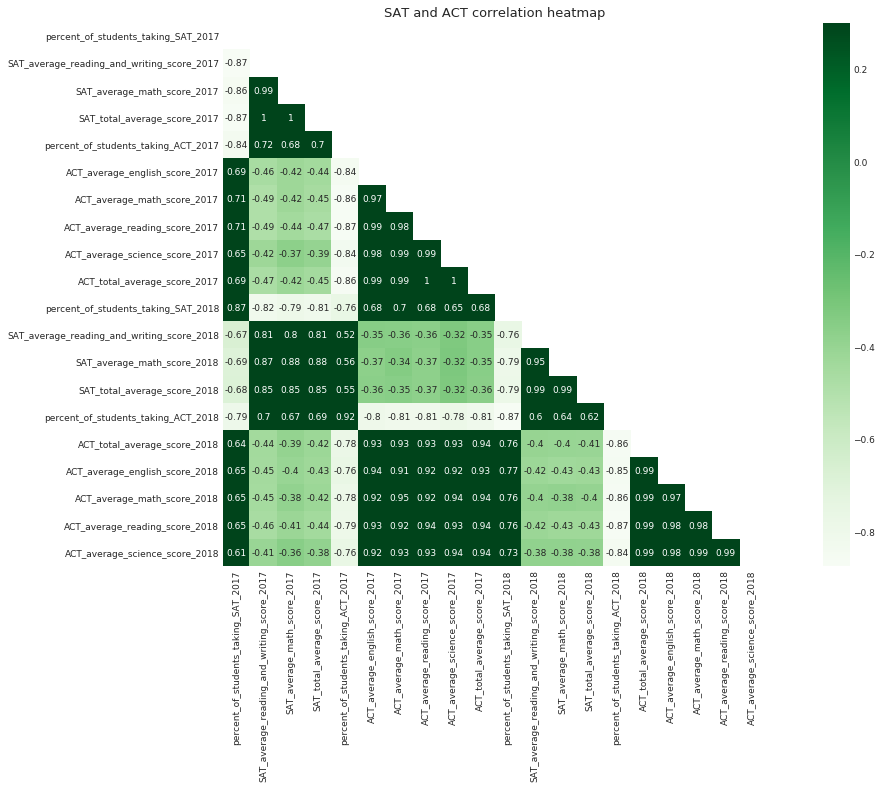

In [90]:
plt.figure(figsize=(18,10))

corr=final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    ax= sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='Greens')
    ax.set_title('SAT and ACT correlation heatmap')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [91]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(column)
        # Set titles, labels, etc here for each subplot

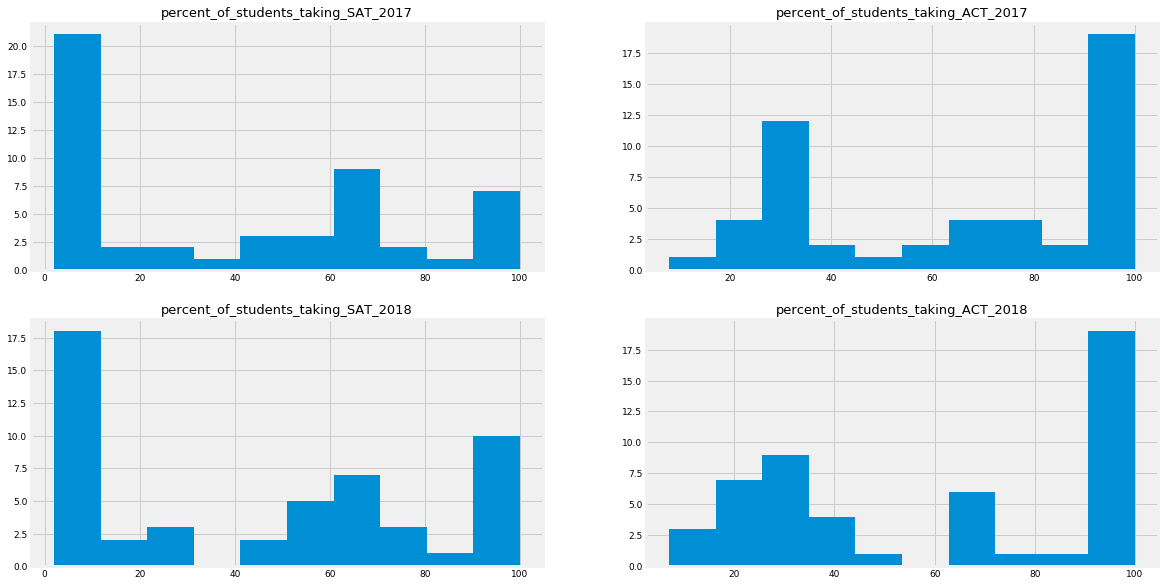

In [92]:
#plotting the histograms using the above subplot function
list_of_columns=['percent_of_students_taking_SAT_2017','percent_of_students_taking_ACT_2017',
                 'percent_of_students_taking_SAT_2018','percent_of_students_taking_ACT_2018']
list_of_titles=['percent_of_students_taking_SAT_2017','percent_of_students_taking_ACT_2017',
                 'percent_of_students_taking_SAT_2018','percent_of_students_taking_ACT_2018']
list_of_xlabels=['percent_of_students_taking_SAT_2017','percent_of_students_taking_ACT_2017',
                 'percent_of_students_taking_SAT_2018','percent_of_students_taking_ACT_2018']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation rates for SAT & ACT** - The participation rates for SAT and ACT are quite varied across states. A comparison of the histograms for SAT and ACT for 2018 indicate that there are greater number of states in SAT 2018 that have a low participation rate as compared to ACT 2018 in which greater number of states have higher participation rate. 

**Math scores for SAT & ACT** - On comparing the Math scores for ACT and SAT 2018, there emerged a startling trend.Fewer states had an average Math score above 80% in ACT as compared to the SAT scores where relatively more number of states scored above 80%.

**Reading/Verbal scores for SAT & ACT** - The charts for SAT and ACT 2018 indicate that a greater number of states have scored above 80% in the SAT verbal section as compared to the top 80% scores in the ACT reading section. 

I have drawn histogram for every variable to understand the distribution of the variable. The interpretation for some selected graphs is written above. All the graphs are plotted below for reference. 

In [93]:
#Participation rates for SAT and ACT in 2017 and 2018

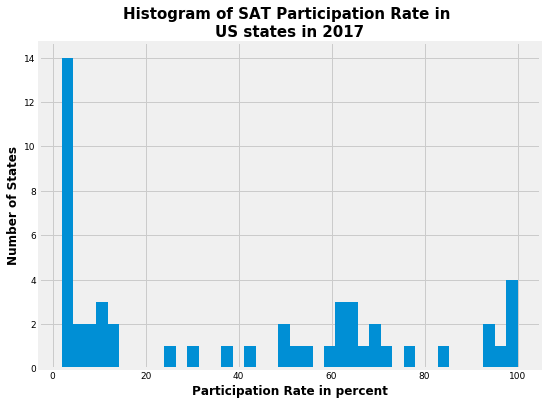

In [94]:
#SAT 2017
final.percent_of_students_taking_SAT_2017.plot(kind='hist', bins=40, figsize=(8,6));
plt.title('Histogram of SAT Participation Rate in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Participation Rate in percent', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);


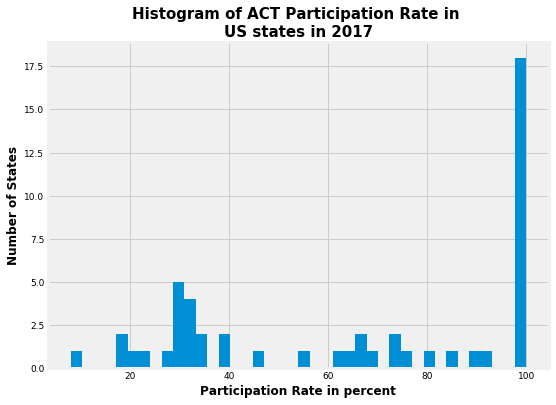

In [95]:
#ACT 2017
final.percent_of_students_taking_ACT_2017.plot(kind='hist', bins=40, figsize=(8,6));
plt.title('Histogram of ACT Participation Rate in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Participation Rate in percent', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

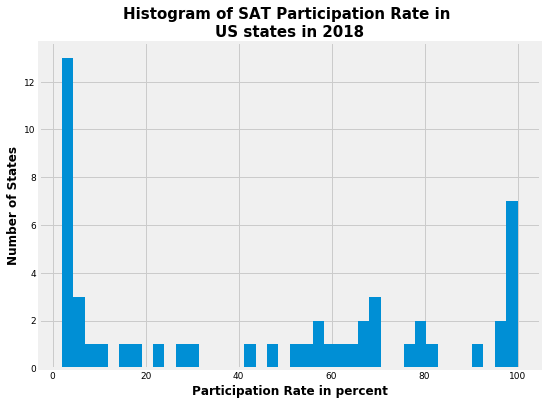

In [96]:
#SAT 2018
final.percent_of_students_taking_SAT_2018.plot(kind='hist', bins=40, figsize=(8,6));
plt.title('Histogram of SAT Participation Rate in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Participation Rate in percent', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

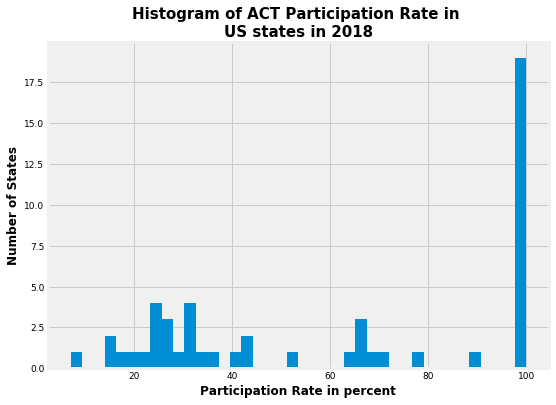

In [97]:
#ACT 2018
final.percent_of_students_taking_ACT_2018.plot(kind='hist', bins=40, figsize=(8,6));
plt.title('Histogram of ACT Participation Rate in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Participation Rate in percent', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

In [98]:
#Math scores for SAT and ACT in 2017 and 2018

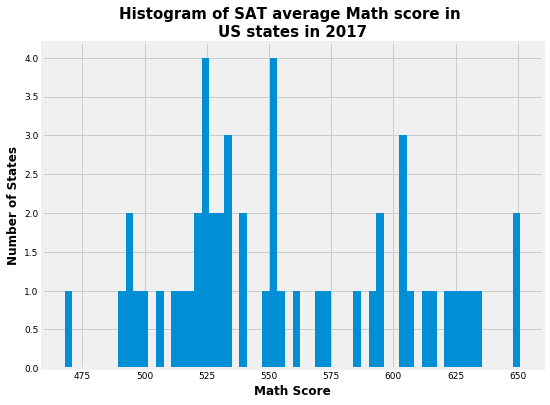

In [99]:
#SAT 2017
final.SAT_average_math_score_2017.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of SAT average Math score in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Math Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

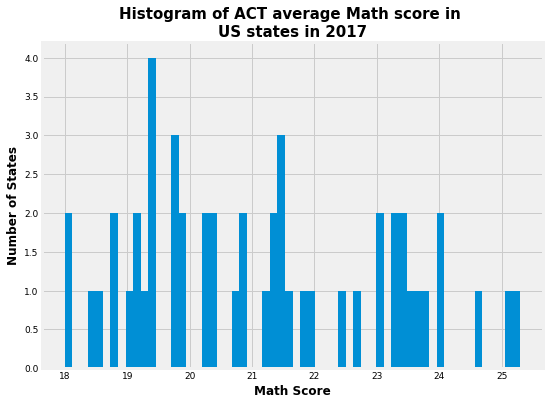

In [100]:
#ACT 2017
final.ACT_average_math_score_2017.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of ACT average Math score in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Math Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

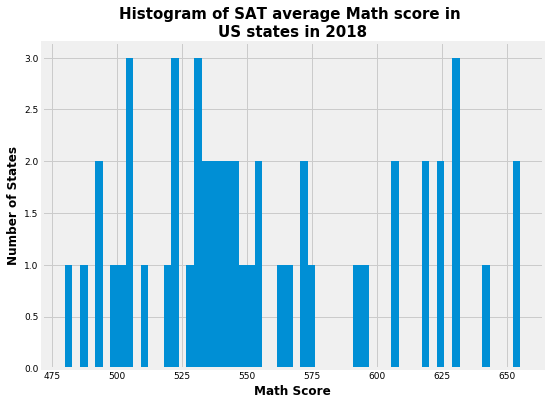

In [101]:
#SAT 2018
final.SAT_average_math_score_2018.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of SAT average Math score in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Math Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

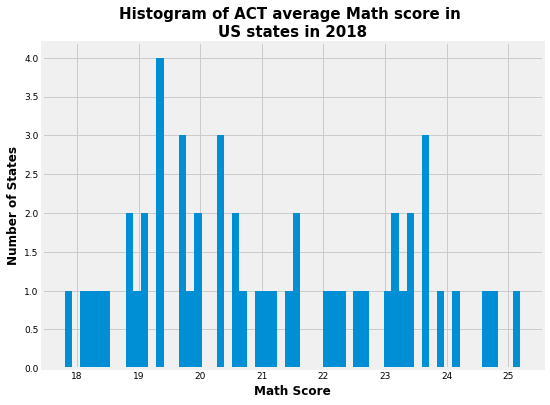

In [102]:
#ACT 2018
final.ACT_average_math_score_2018.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of ACT average Math score in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Math Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

In [103]:
#Reading/verbal scores for SAT and ACT in 2017 and 2018

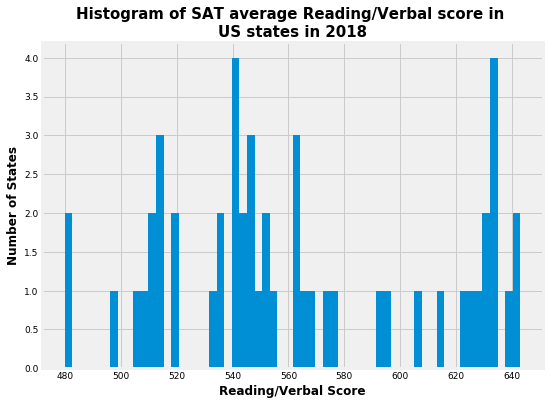

In [104]:
#SAT 2018
final.SAT_average_reading_and_writing_score_2018.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of SAT average Reading/Verbal score in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Reading/Verbal Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

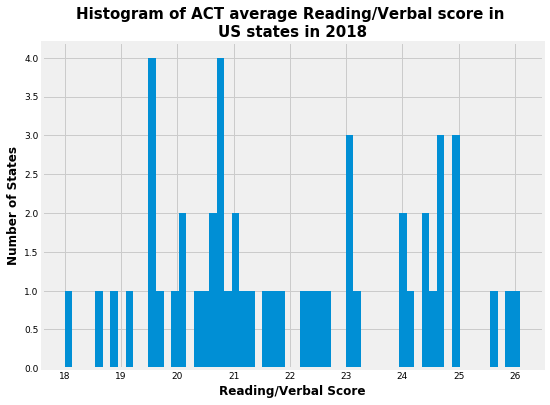

In [105]:
#ACT 2018
final.ACT_average_reading_score_2018.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of ACT average Reading/Verbal score in \nUS states in 2018', weight='bold', size=15)
plt.xlabel('Reading/Verbal Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

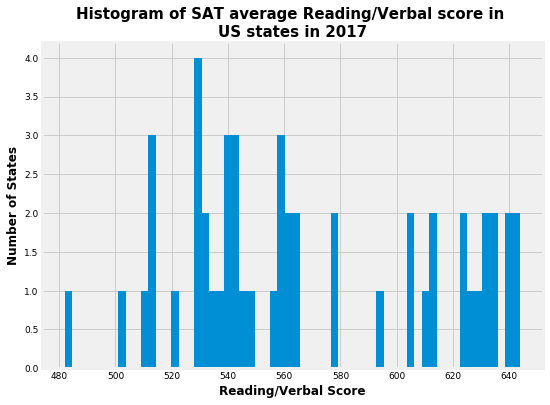

In [106]:
#SAT 2017
final.SAT_average_reading_and_writing_score_2017.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of SAT average Reading/Verbal score in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Reading/Verbal Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

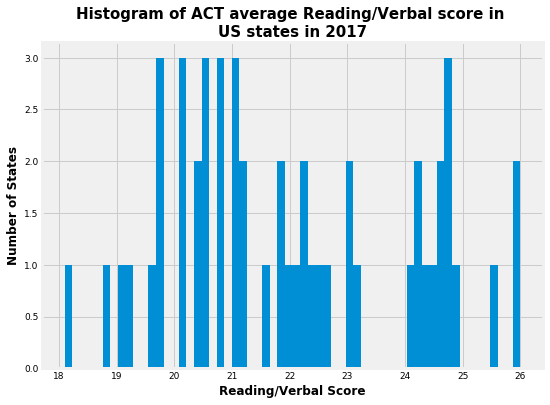

In [107]:
#ACT 2017
final.ACT_average_reading_score_2017.plot(kind='hist', bins=60, figsize=(8,6));
plt.title('Histogram of ACT average Reading/Verbal score in \nUS states in 2017', weight='bold', size=15)
plt.xlabel('Reading/Verbal Score', weight='bold',size=12);
plt.ylabel('Number of States',weight='bold',size=12);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


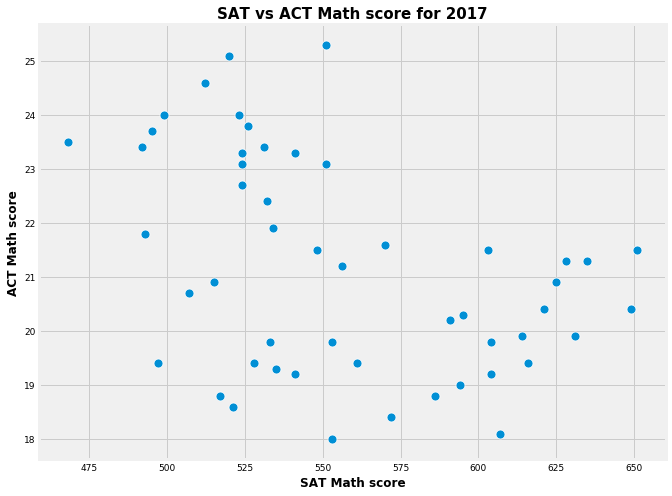

In [108]:
#SAT Vs ACT Math Score for 2017
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['SAT_average_math_score_2017'], y=final['ACT_average_math_score_2017'],s=80);
plt.title("SAT vs ACT Math score for 2017",fontsize=15,weight='bold');
plt.xlabel("SAT Math score",fontsize=12,weight='bold');
plt.ylabel("ACT Math score",fontsize=12,weight='bold');
plt.show()

**Interpretation**- The above graph shows that the SAT and ACT Math scores for 2017 are negatively related to each other. As SAT Math scores increase, the ACT scores decline or vice-versa. Here, although the scales are different given SAT has a score range between 200 and 800 for each of its section and ACT has score range between 1 and 36 for each of its section, the correlation coefficient isn't affected and the inverse relationship between the variable doesn't change. 

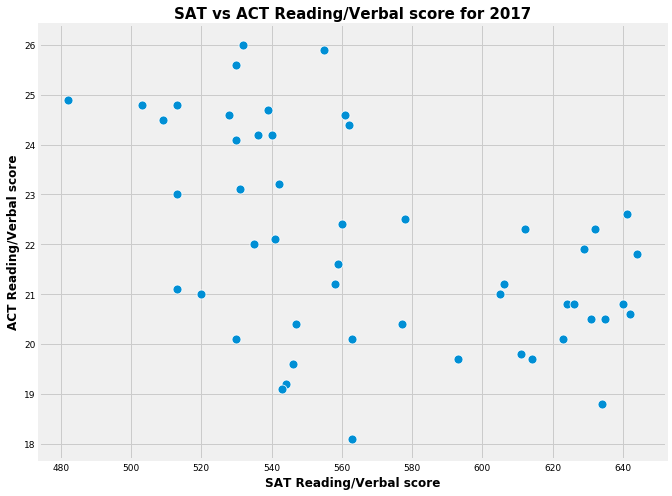

In [109]:
#SAT Vs ACT Reading/Verbal Score for 2017
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['SAT_average_reading_and_writing_score_2017'], y=final['ACT_average_reading_score_2017'],s=80);
plt.title("SAT vs ACT Reading/Verbal score for 2017",fontsize=15,weight='bold');
plt.xlabel("SAT Reading/Verbal score",fontsize=12,weight='bold');
plt.ylabel("ACT Reading/Verbal score",fontsize=12,weight='bold');

**Interpretation**- The above graph shows an inverse relationship between the reading/verbal scores for SAT and ACT in 2017. The relationship, although negative, is not so strong given that the correlation coefficient between SAT reading/verbal score and ACT reading/verbal score is just -0.49. 

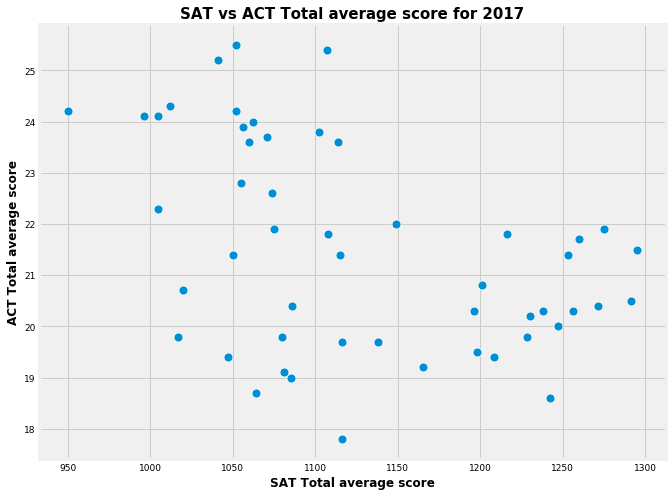

In [110]:
#SAT Vs ACT Total/composite Score for 2017
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['SAT_total_average_score_2017'], y=final['ACT_total_average_score_2017'],s=80);
plt.title("SAT vs ACT Total average score for 2017",fontsize=15,weight='bold');
plt.xlabel("SAT Total average score",fontsize=12,weight='bold');
plt.ylabel("ACT Total average score",fontsize=12,weight='bold');

**Interpretation**- The above scatterplot shows that the total average score for SAT and ACT for 2017 is negatively related. This means that as SAT total average scores increase, the ACT total average scores decrease. Although the plot does not show a steep downward trend but the correlation coefficient for the two variables is around -0.45.  

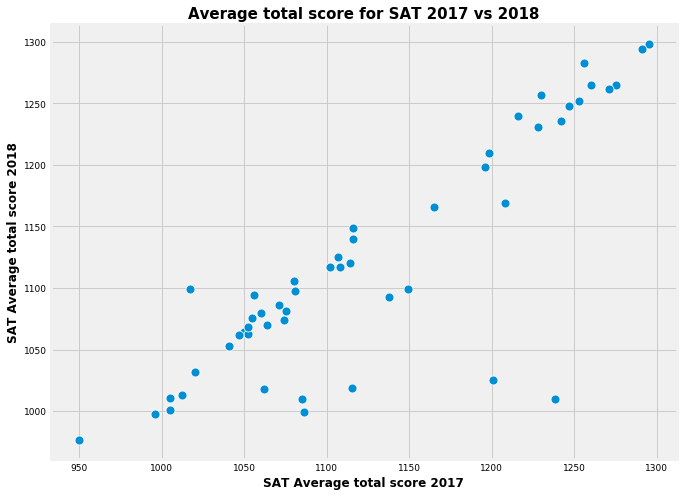

In [111]:
#Total scores for SAT 2017 vs. 2018 
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['SAT_total_average_score_2017'], y=final['SAT_total_average_score_2018'],s=80);
plt.title("Average total score for SAT 2017 vs 2018",fontsize=15,weight='bold');
plt.xlabel("SAT Average total score 2017",fontsize=12,weight='bold');
plt.ylabel("SAT Average total score 2018",fontsize=12,weight='bold');

**Interpretation**- The above graph compares the average total score for SAT in 2017 and 2018. The scatterplot shows a strong positive relationship between the two variables with a few outliers. As SAT average total scores for 2017 increase, the SAT average total scores for 2018 also increase or vice-versa. There exists a strong correlation between the two variables. 

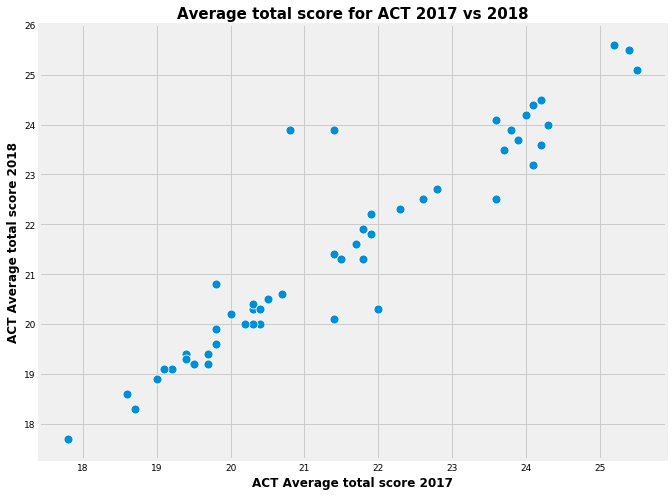

In [112]:
#Composite scores for ACT 2017 vs. 2018
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['ACT_total_average_score_2017'], y=final['ACT_total_average_score_2018'],s=80);
plt.title("Average total score for ACT 2017 vs 2018",fontsize=15,weight='bold');
plt.xlabel("ACT Average total score 2017",fontsize=12,weight='bold');
plt.ylabel("ACT Average total score 2018",fontsize=12,weight='bold');

**Interpretation**- The above graph compares the average total score for ACT in 2017 and 2018. The scatterplot shows a strong positive relationship between the two variables with a few outliers. As the average total scores for ACT increase in 2017, the average total scores for ACT in 2018 also increase or vice-versa. There exists a strong correlation between the two variables. 

In [113]:
final.shape

(51, 21)

In [114]:
final.columns

Index(['state', 'percent_of_students_taking_SAT_2017',
       'SAT_average_reading_and_writing_score_2017',
       'SAT_average_math_score_2017', 'SAT_total_average_score_2017',
       'percent_of_students_taking_ACT_2017', 'ACT_average_english_score_2017',
       'ACT_average_math_score_2017', 'ACT_average_reading_score_2017',
       'ACT_average_science_score_2017', 'ACT_total_average_score_2017',
       'percent_of_students_taking_SAT_2018',
       'SAT_average_reading_and_writing_score_2018',
       'SAT_average_math_score_2018', 'SAT_total_average_score_2018',
       'percent_of_students_taking_ACT_2018', 'ACT_total_average_score_2018',
       'ACT_average_english_score_2018', 'ACT_average_math_score_2018',
       'ACT_average_reading_score_2018', 'ACT_average_science_score_2018'],
      dtype='object')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

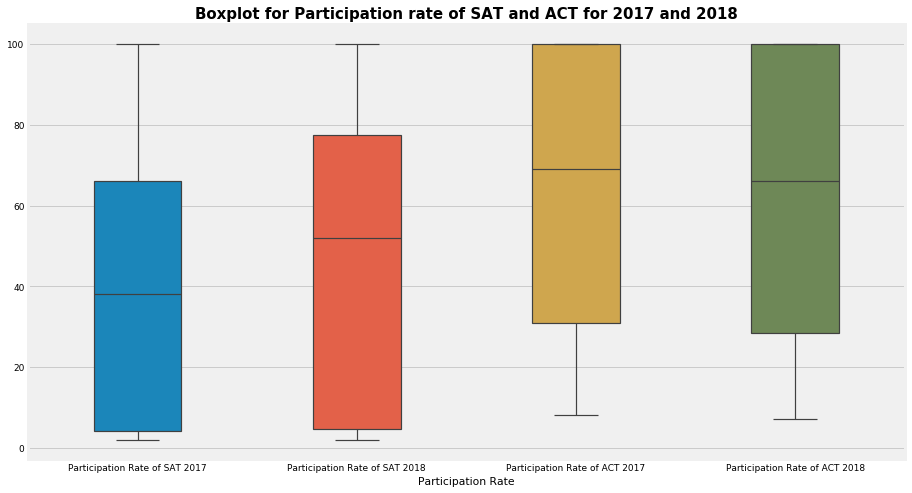

In [115]:
#Boxplot for Participation Rates for SAT and ACT for 2017 and 2018
plt.figure(figsize=(14,8))
sns.boxplot(data=final.loc[:,['percent_of_students_taking_SAT_2017','percent_of_students_taking_SAT_2018',
                           'percent_of_students_taking_ACT_2017','percent_of_students_taking_ACT_2018']], width=0.4, linewidth = 1.2);
plt.title("Boxplot for Participation rate of SAT and ACT for 2017 and 2018",fontsize=15,weight='bold');
plt.xticks(np.arange(4),['Participation Rate of SAT 2017',
       'Participation Rate of SAT 2018','Participation Rate of ACT 2017',
                         'Participation Rate of ACT 2018']);
plt.xlabel("Participation Rate");

**Interpretation**- The above graph shows boxplots for participation rate or percent of students taking SAT and ACT in 2017 and 2018. If we compare the box plot for SAT in 2017 and 2018 (blue and orange boxes), we will notice that the median participation rate for SAT in 2018 increased from around 38% in 2017 to nearly 50%. However, the boxplots for ACT 2017 and 2018 (yellow and green boxes) indicate that the median participation rate for ACT in 2018 decreased from the previous year. Also, the median participation rates for ACT for both the years is higher than SAT. 
Another interesting point to notice is that the SAT participation rate for 2018 is a negatively skewed distribution indicating that the data has more number of low valued rates. On the other hand, the distribution of ACT participation rate 2018 is somewhat around the median. 

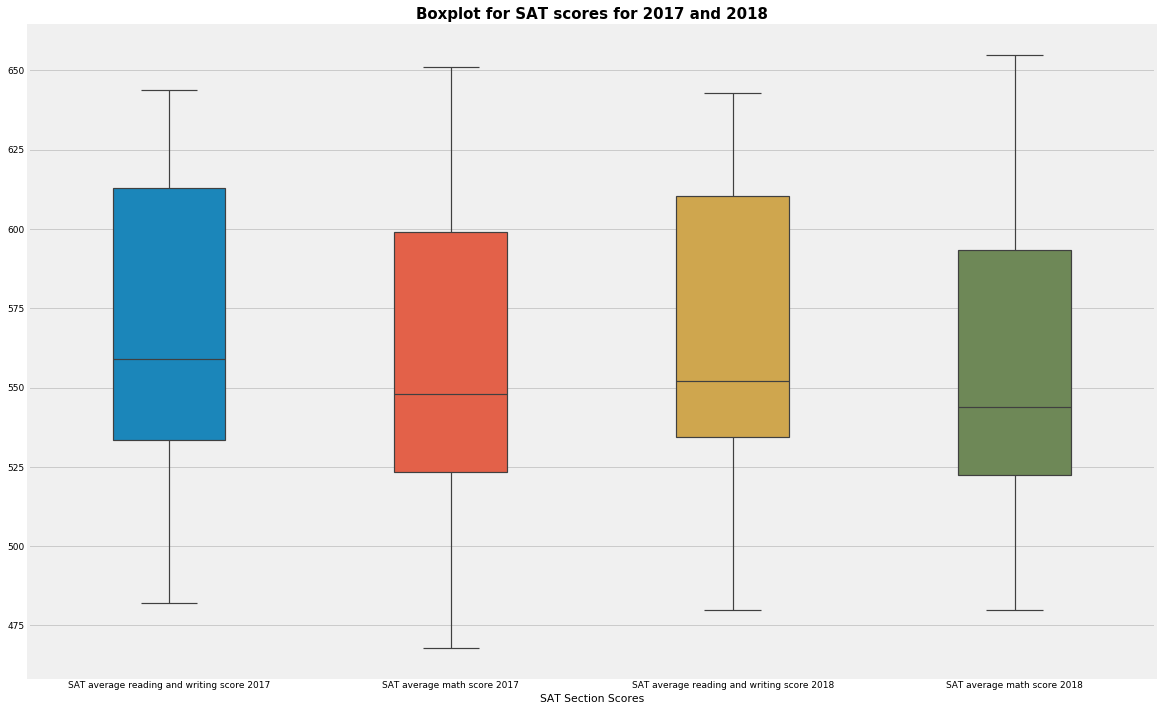

In [116]:
#Boxplot for SAT scores in 2017 and 2018
plt.figure(figsize=(18,12))
sns.boxplot(data=final.loc[:,['SAT_average_reading_and_writing_score_2017',
       'SAT_average_math_score_2017','SAT_average_reading_and_writing_score_2018',
       'SAT_average_math_score_2018']],width=0.4, linewidth = 1.2);
plt.title("Boxplot for SAT scores for 2017 and 2018",fontsize=15,weight='bold');
plt.xticks(np.arange(4),['SAT average reading and writing score 2017',
       'SAT average math score 2017', 'SAT average reading and writing score 2018',
       'SAT average math score 2018']);
plt.xlabel('SAT Section Scores');

**Interpretation**- The above graph shows the boxplots for SAT section scores (Reading and Math) for 2017 and 2018. The distribution of all the scores is positively skewed indicating that the data consists of a greater number of scores that are high valued scores. Also, the median Math score is less than the median Reading and Writing score for SAT in both years.  

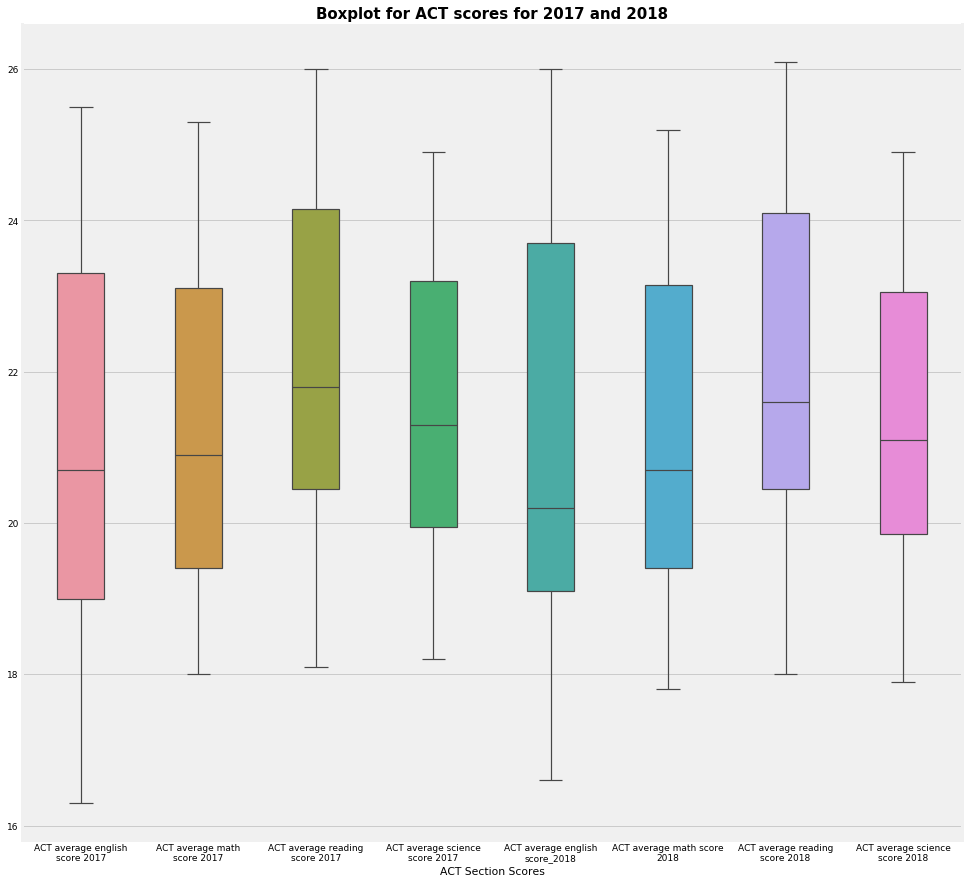

In [117]:
#Boxplot for ACT scores for 2017 and 2018
plt.figure(figsize=(15,15))
sns.boxplot(data=final.loc[:,['ACT_average_english_score_2017', 'ACT_average_math_score_2017',
       'ACT_average_reading_score_2017', 'ACT_average_science_score_2017',
       'ACT_average_english_score_2018', 'ACT_average_math_score_2018',
       'ACT_average_reading_score_2018', 'ACT_average_science_score_2018']],width=0.4, linewidth = 1.2);
plt.title("Boxplot for ACT scores for 2017 and 2018",fontsize=15,weight='bold');
plt.xticks(np.arange(8),['ACT average english\nscore 2017', 'ACT average math\nscore 2017',
       'ACT average reading\nscore 2017', 'ACT average science\nscore 2017',
       'ACT average english\nscore_2018', 'ACT average math score\n2018',
       'ACT average reading\nscore 2018', 'ACT average science\nscore 2018']);
plt.xlabel('ACT Section Scores');

**Interpretation**- The above graph shows the boxplots for ACT section scores for the years 2017 and 2018. The median English score in ACT was the lowest for 2018. The highest median score in ACT is for Reading section in 2017. the distribution for all the scores are somewhat positively skewed given that the median is closer to the lower quartile. This indicates that the data consists of greater numbee of high valued scores. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

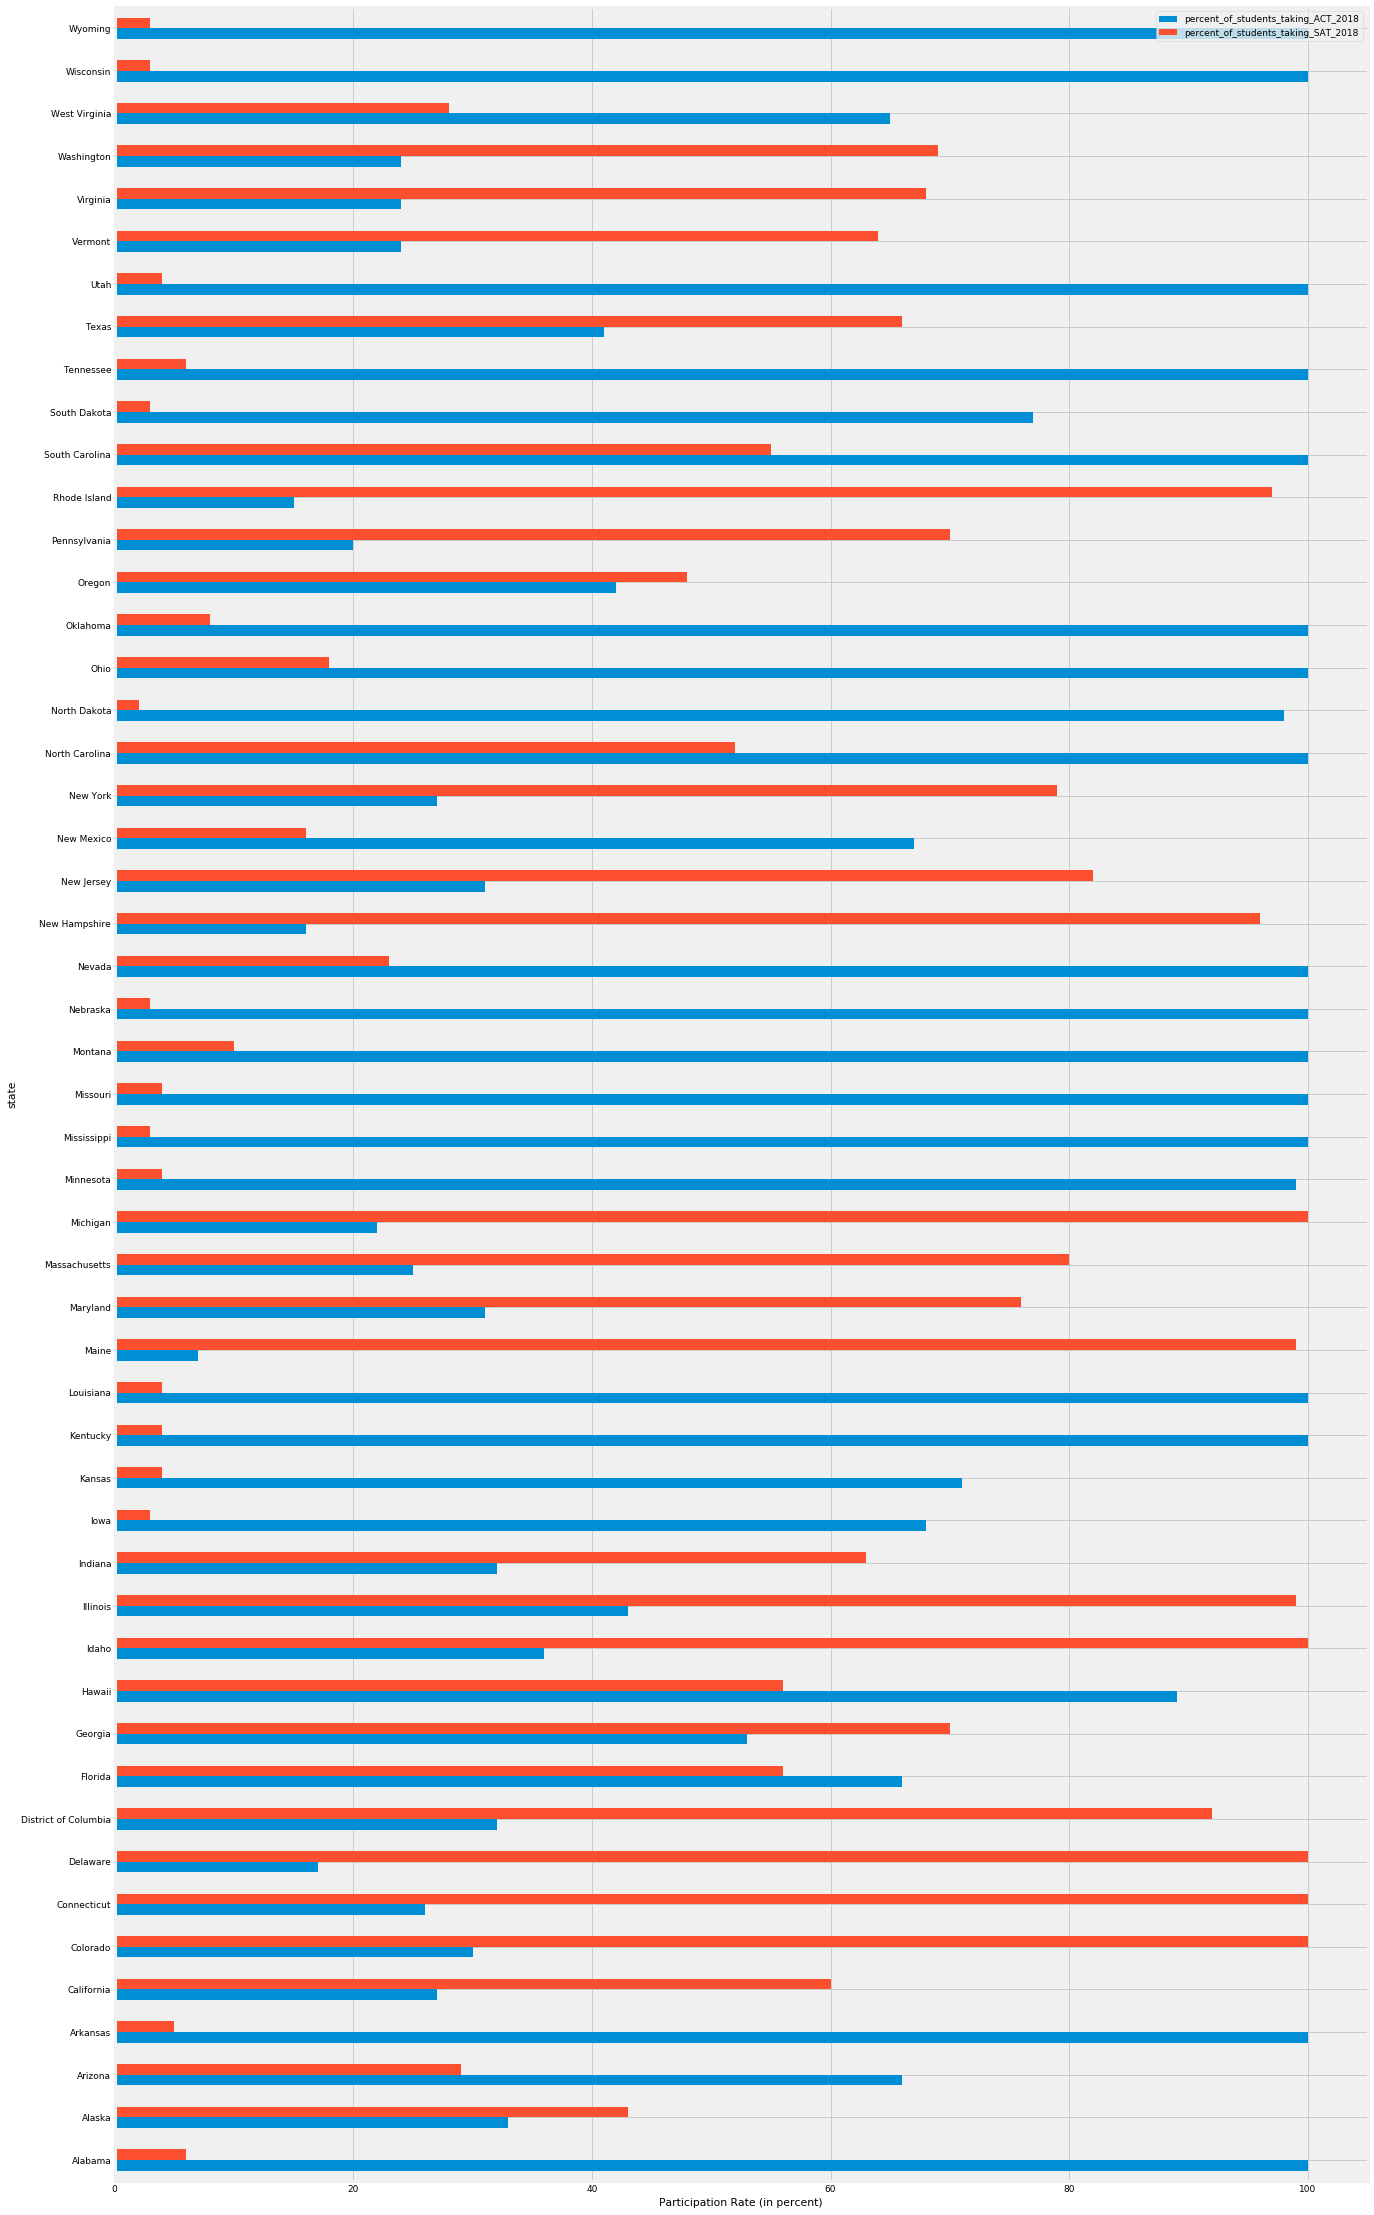

In [118]:
#Horizontal bar graph for state participation rates in ACT and SAT in 2018
final.plot(kind='barh',y=['percent_of_students_taking_ACT_2018','percent_of_students_taking_SAT_2018'],
           x='state',figsize=(20,40));
plt.xlabel('Participation Rate (in percent)');

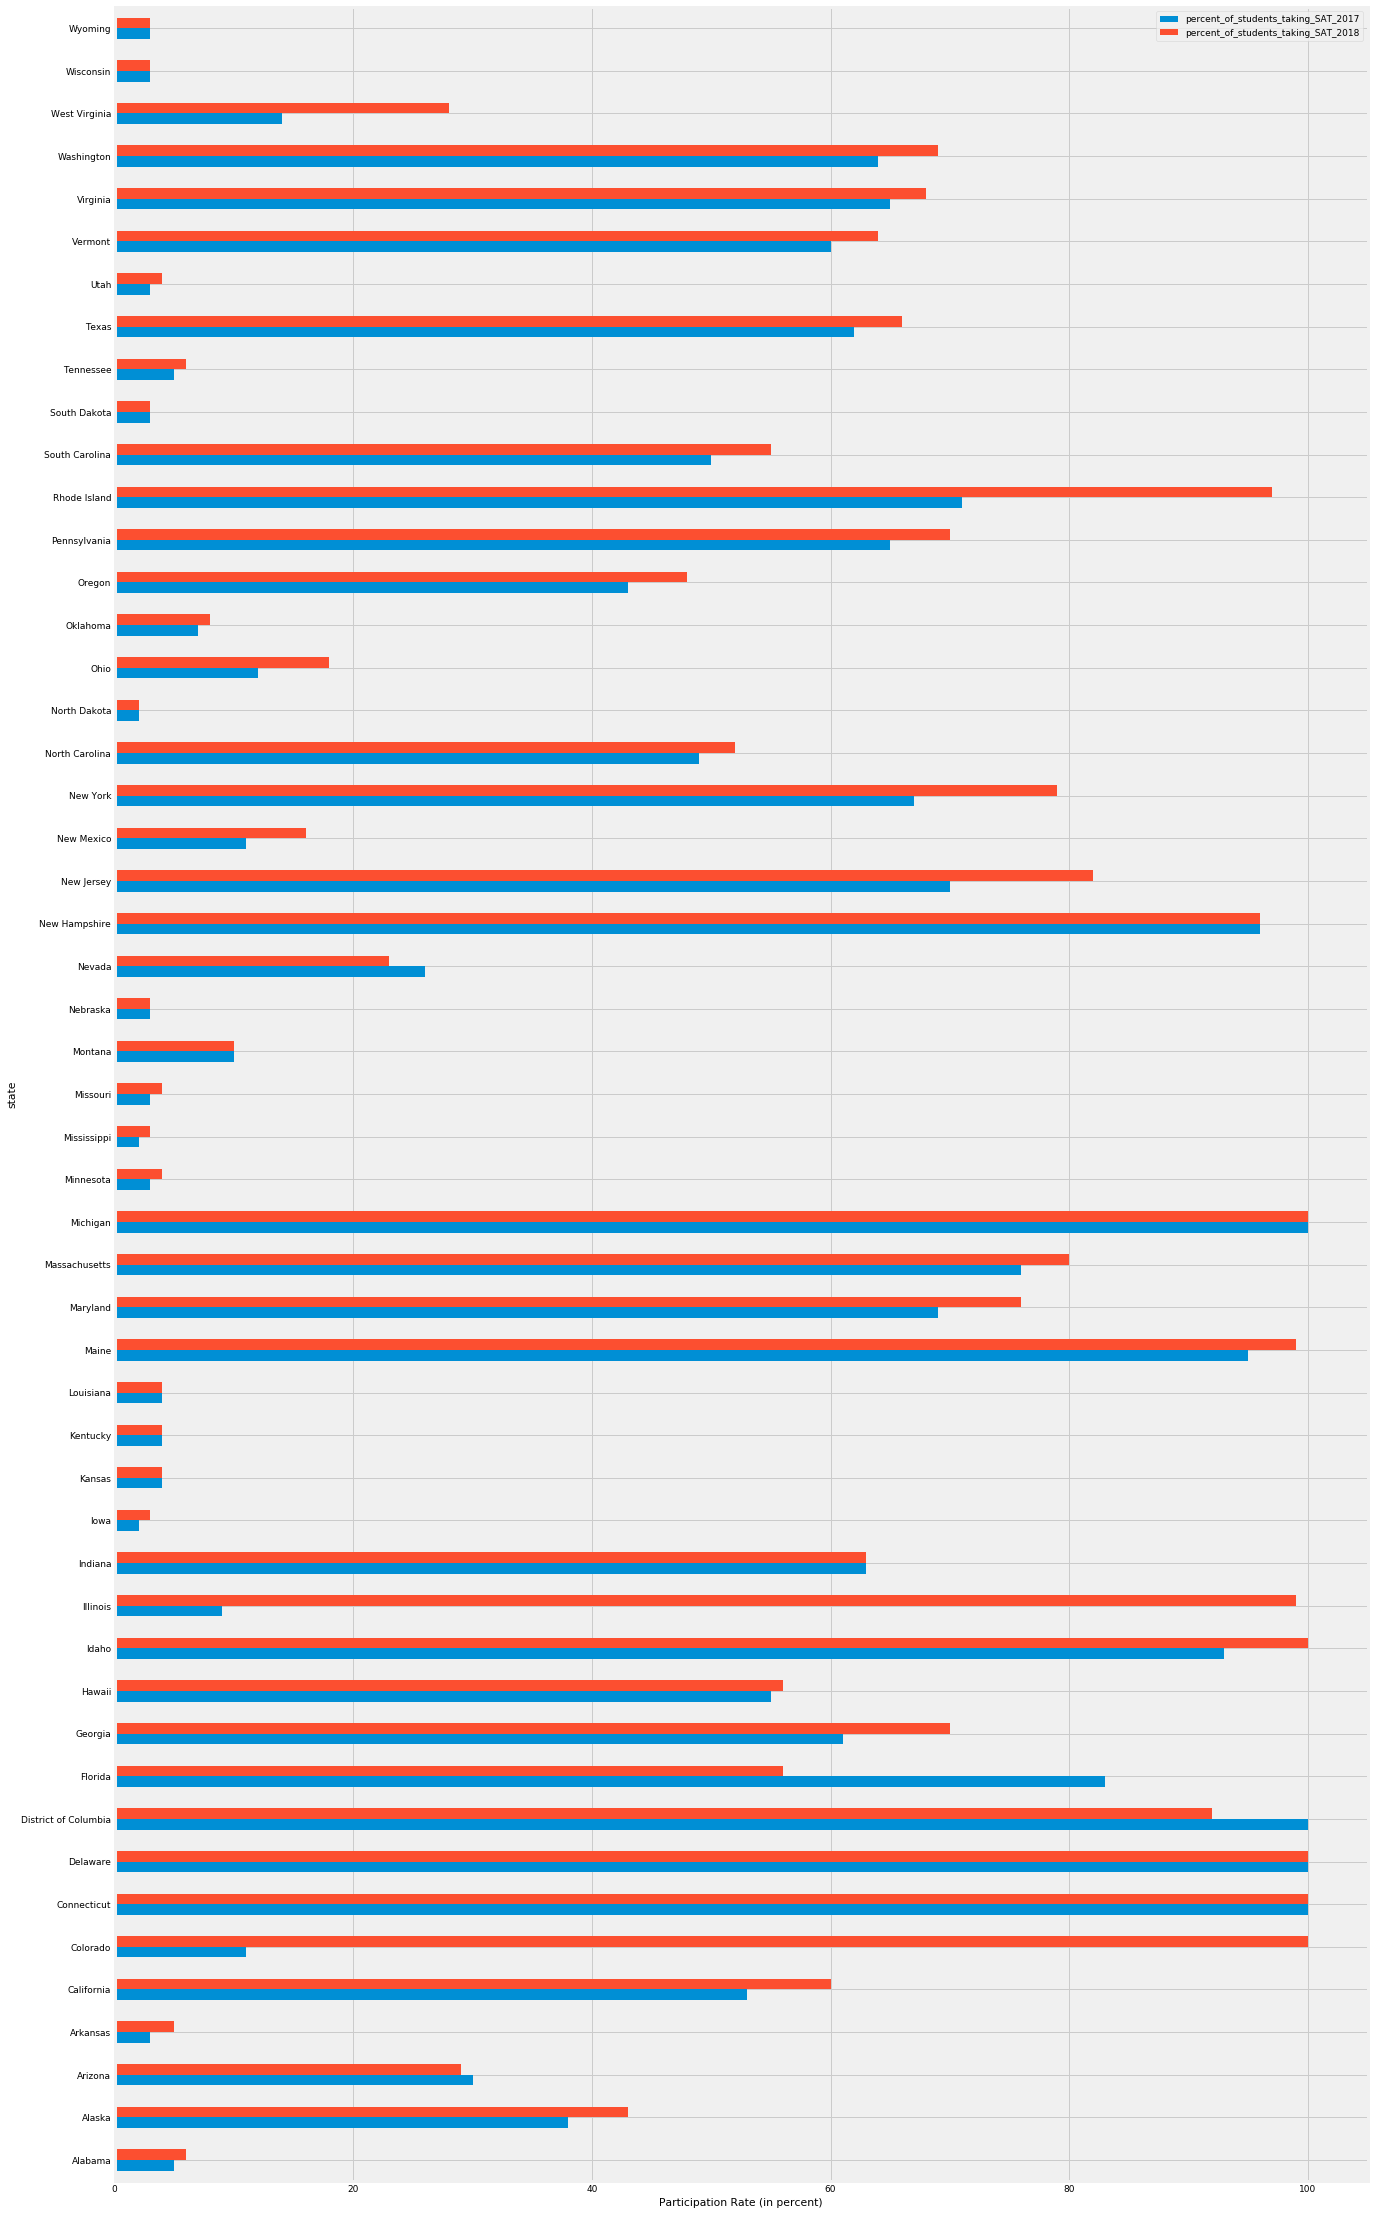

In [119]:
#Horizontal bar graph for state participation rates for SAT in 2017 and 2018
final.plot(kind='barh',y=['percent_of_students_taking_SAT_2017','percent_of_students_taking_SAT_2018'],
           x='state',figsize=(20,40));
plt.xlabel('Participation Rate (in percent)');

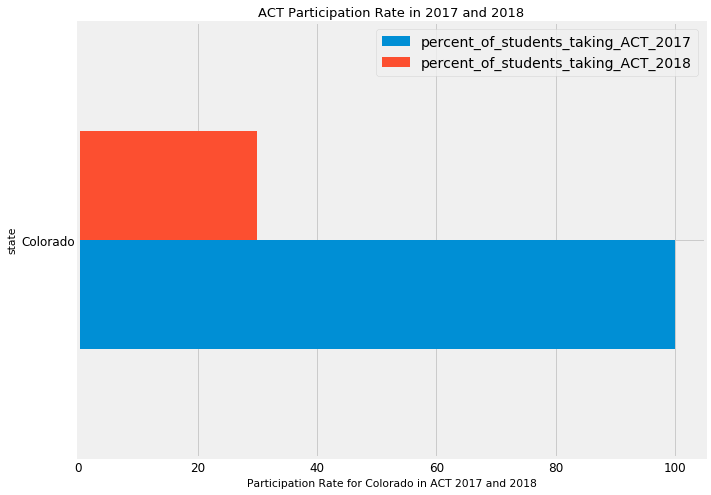

In [120]:
#Plotting ACT participation rate for Colorado in 2017 and 2018
final[final['state']=="Colorado"].plot(kind='barh',y=['percent_of_students_taking_ACT_2017','percent_of_students_taking_ACT_2018'],
                               x='state',figsize=(10,8), 
           legend='best', title ='ACT Participation Rate in 2017 and 2018',fontsize=12);
plt.legend(fontsize=14);
plt.xlabel("Participation Rate for Colorado in ACT 2017 and 2018");

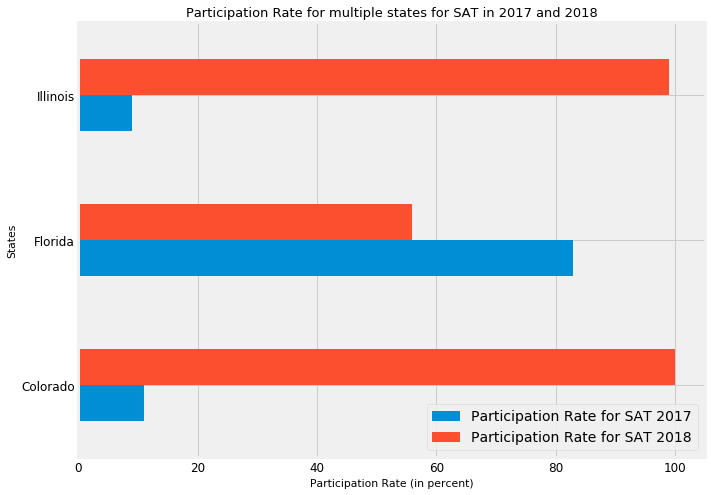

In [133]:
#Bar graph for multiple states for Participation rate of students in SAT for 2017 and 2018
final[final['state'].isin(["Colorado","Illinois","Florida"])].plot(kind='barh',
                            y=['percent_of_students_taking_SAT_2017','percent_of_students_taking_SAT_2018'],
                               x='state',figsize=(10,8), 
           legend='best', title ='Participation Rate for multiple states for SAT in 2017 and 2018',fontsize=12);
plt.legend(('Participation Rate for SAT 2017', 'Participation Rate for SAT 2018'), fontsize=14);
plt.xlabel("Participation Rate (in percent)");
plt.ylabel('States');

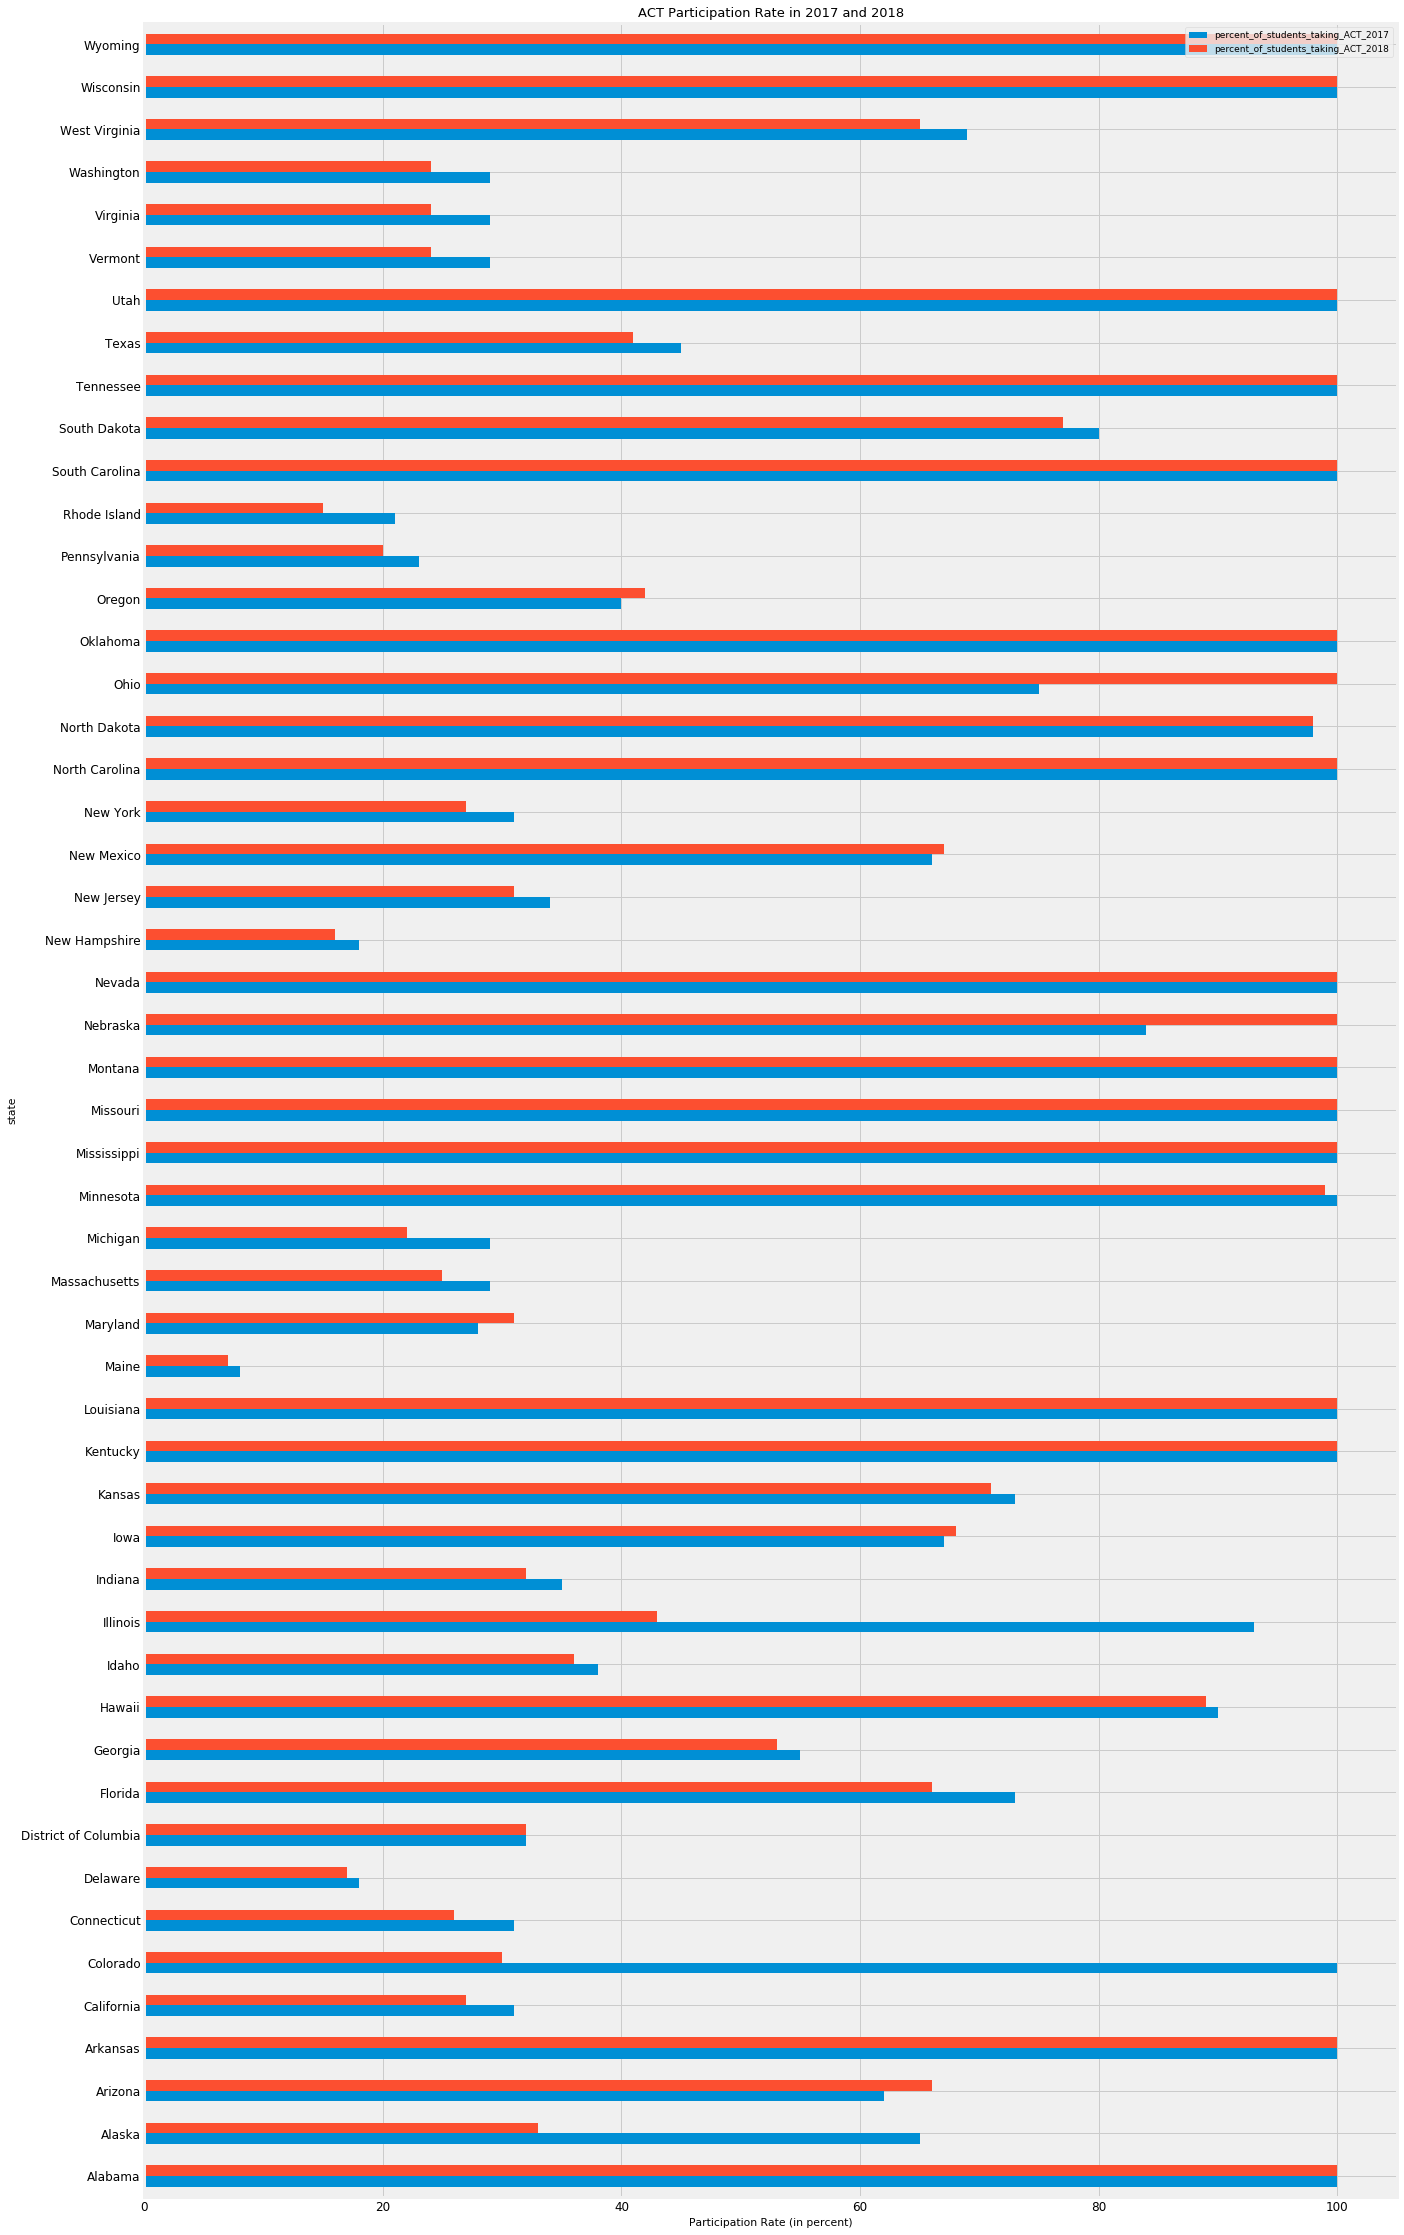

In [122]:
#Bar graph for Participation rate in Act in 2017 and 2018
final.plot(kind='barh',y=['percent_of_students_taking_ACT_2017','percent_of_students_taking_ACT_2018'],
           x='state',figsize=(20,40), 
           legend='best', title ='ACT Participation Rate in 2017 and 2018',fontsize=12);
plt.xlabel('Participation Rate (in percent)');

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

**Answers**: The distribution for SAT participation rate for 2017 is somewhat symmetric. However, the distribution of SAT Participation rate for 2018 is negatively skewed. The mean and median values for ACT participation rates for 2018 is also not significantly different, indicating that the distribution is nearly symmetric. On the other hand, the distribution for ACT participation rate is negatively skewed. The distribution for other variables is explained in detail in the boxplot and histogram sections. 

In [123]:
#describe used to provide summary statistics of the columns in the dataframe
final.describe().T

,count,mean,std,min,25%,50%,75%,max
percent_of_students_taking_SAT_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
SAT_average_reading_and_writing_score_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
SAT_average_math_score_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
SAT_total_average_score_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
percent_of_students_taking_ACT_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT_average_english_score_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT_average_math_score_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT_average_reading_score_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT_average_science_score_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
ACT_total_average_score_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

**Answer**: No, the sample distribution for SAT participation rate for 2017 is not normally distributed. It is apparent from the kernel density plot (smooth version of the histogram). KDE plot indicates how the distribution will change as the sample size increases. (use of Central limit theorem - if we assume that the data we sample is from a normal distribution, then as the number of observations increase, the distribution will become normal). 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer**: The below shown histograms with the KDE plots show that the Math scores for both SAT and ACT are not normally distributed. The same holds for Reading scores as well. This is clearly shown by the KDE plot. However, as the number of oservations in the dataset would grow, adding more states from other regions and comparing their ACT and SAT scores, then the distribution may become normal. 

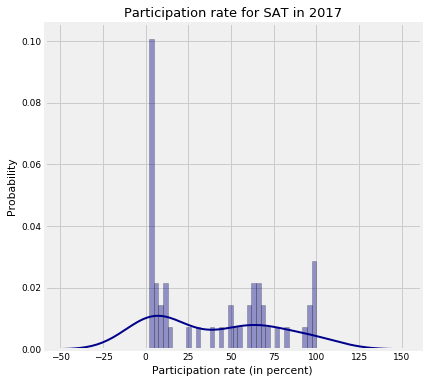

In [124]:
#Histogram and KDE plot for SAT Participation Rate in 2017
plt.figure(figsize=(6,6))
sns.distplot(final['percent_of_students_taking_SAT_2017'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.ylabel('Probability');
plt.title('Participation rate for SAT in 2017');
plt.xlabel('Participation rate (in percent)');

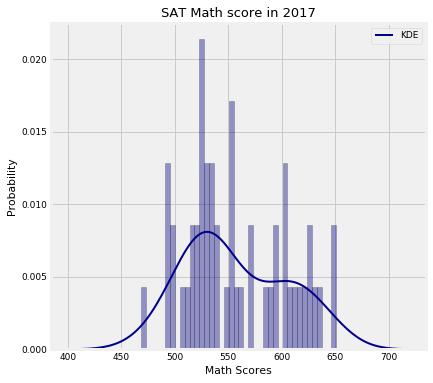

In [125]:
#Histogram and KDE plot for Math Score in SAT 2017
plt.figure(figsize=(6,6))

sns.distplot(final['SAT_average_math_score_2017'], hist=True, kde=True, 
             bins=40, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'label':'KDE'});
plt.ylabel('Probability');
plt.title('SAT Math score in 2017');
plt.xlabel('Math Scores');

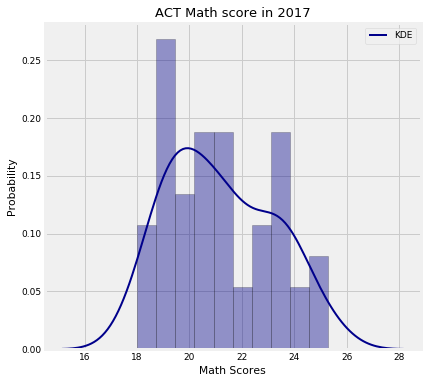

In [126]:
# Histogram and KDE plot for Math Score for ACT 2017
plt.figure(figsize=(6,6))
sns.distplot(final['ACT_average_math_score_2017'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'label':'KDE'})
plt.ylabel('Probability');
plt.title('ACT Math score in 2017');
plt.xlabel('Math Scores');

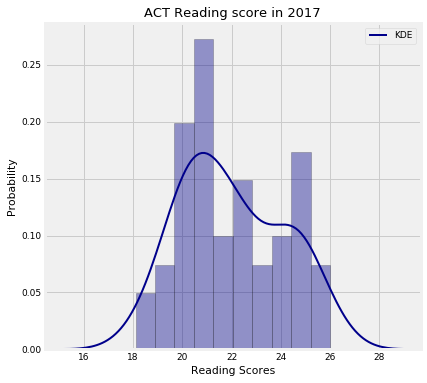

In [127]:
#Histogram and KDE plot for Reading Score for ACT 2017
plt.figure(figsize=(6,6))
sns.distplot(final['ACT_average_reading_score_2017'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'label':'KDE'});
plt.ylabel('Probability');
plt.title('ACT Reading score in 2017');
plt.xlabel('Reading Scores');

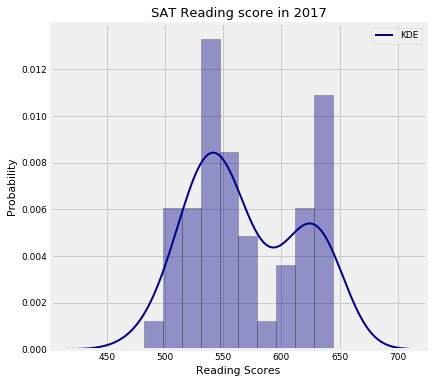

In [128]:
#Histogram and KDE plot for Reading Score for SAT 2017
plt.figure(figsize=(6,6))
sns.distplot(final['SAT_average_reading_and_writing_score_2017'], hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2,'label':'KDE'});
plt.ylabel('Probability');
plt.title('SAT Reading score in 2017');
plt.xlabel('Reading Scores');

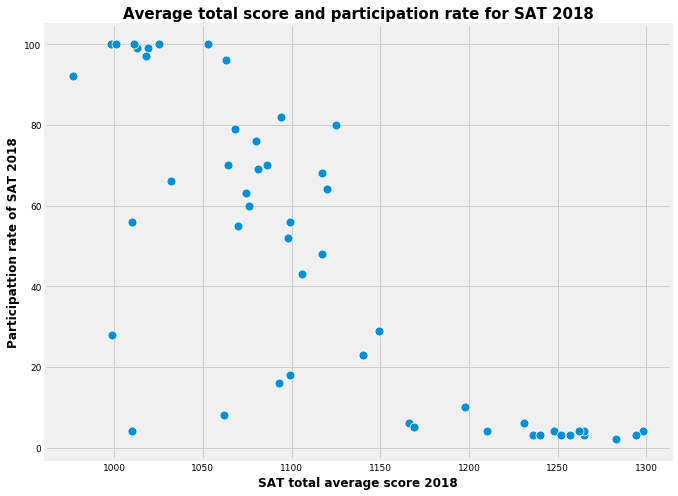

In [129]:
#Scatter plot for Participation Rate and total average scores for SAT in 2018
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['SAT_total_average_score_2018'], y=final['percent_of_students_taking_SAT_2018'],s=80);
plt.title("Average total score and participation rate for SAT 2018",fontsize=15,weight='bold');
plt.xlabel("SAT total average score 2018",fontsize=12,weight='bold');
plt.ylabel("Participattion rate of SAT 2018",fontsize=12,weight='bold');

**Interpretation**: The scatterplot between SAT participation rate and total average scores indicates that the two variables are inversely related except a few outliers. As the participation rate for SAT increases, the total average score declines in the given year or vice-versa.

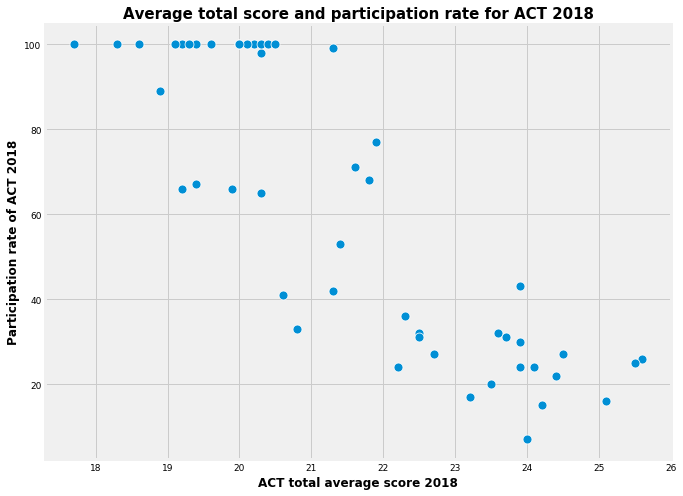

In [130]:
#Scatter plot for Participation Rate and total average scores for ACT in 2018
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['ACT_total_average_score_2018'], y=final['percent_of_students_taking_ACT_2018'],s=80);
plt.title("Average total score and participation rate for ACT 2018",fontsize=15,weight='bold');
plt.xlabel("ACT total average score 2018",fontsize=12,weight='bold');
plt.ylabel("Participation rate of ACT 2018",fontsize=12,weight='bold');

**Interpretation**: The scatterplot between ACT participation rate and total average scores indicates that the two variables are negatively related except a few outliers. As the participation rate for ACT increases, the total average score declines in the given year or vice-versa.

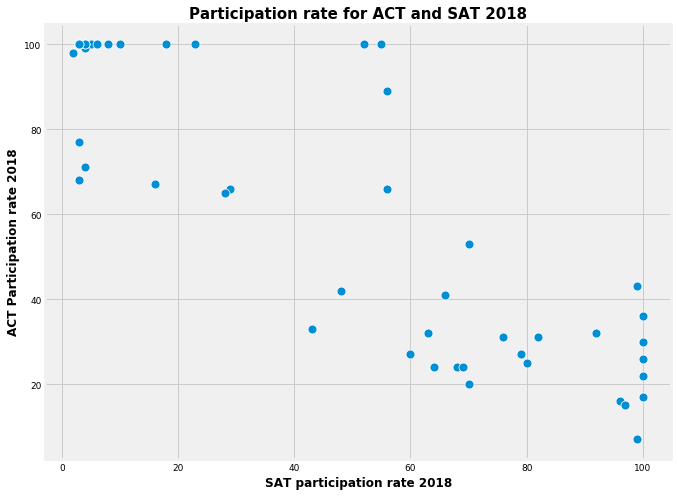

In [131]:
#Scatter plot for Participation Rate for ACT and SAT in 2018
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['percent_of_students_taking_SAT_2018'], y=final['percent_of_students_taking_ACT_2018'],s=80);
plt.title("Participation rate for ACT and SAT 2018",fontsize=15,weight='bold');
plt.xlabel("SAT participation rate 2018",fontsize=12,weight='bold');
plt.ylabel("ACT Participation rate 2018",fontsize=12,weight='bold');

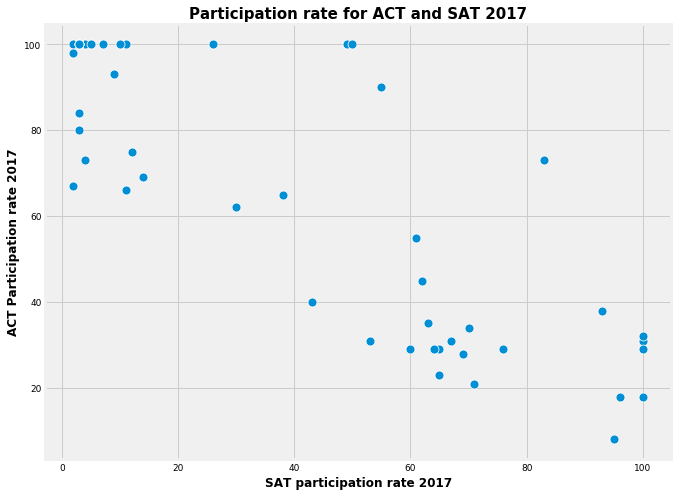

In [132]:
#Scatter plot for Participation Rate for ACT and SAT in 2017
plt.figure(figsize=(10,8));
ax=sns.scatterplot(x=final['percent_of_students_taking_SAT_2017'], y=final['percent_of_students_taking_ACT_2017'],s=80);
plt.title("Participation rate for ACT and SAT 2017",fontsize=15,weight='bold');
plt.xlabel("SAT participation rate 2017",fontsize=12,weight='bold');
plt.ylabel("ACT Participation rate 2017",fontsize=12,weight='bold');

**Interpretation**: The scatterplot between ACT and SAT participation rate for both the years indicate that the two variables are negatively related with a few outliers. As the participation rate for ACT increases, the participation rate for SAT declines in the given year or vice-versa.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer**: No, it won't be appropriate to conduct statistical inference between SAT and ACT participation rates in 2017 given that the states differ in terms of the population size and the number of high school graduates in those states. We are provided with the average scores of the two tests in each state and not the individual values of scores achieved by each test taker in each state. So, taking a mean of the mean values does not have any meaning. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer**: No, it is not appropriate to compare the SAT and ACT Math scores because both of these variables are measured on different scales. We are provided the average scores in each state. If we were given individual values for each test taker in each state, we would have been able to make a statistical inference and conduct hypothesis testing. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Do states score differently on SAT Math and Verbal scores? 

**Answer**: We can't make this comparison as we are provided mean scores and participation rates for each state and not the indiviual values of scores for each test taker in each state in the United States. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Three most interesting states when it comes to understanding the participation rates in SAT and ACT exams are **Colorado, Illinois and Florida.** 

- Colorado’s SAT participation rates jumped by 89 percentage points between 2017 and 2018. 

- Illinois showed a similar trend: between 2017 and 2018, SAT participation rates increased by 90 percentage points. 

- Florida, on the other hand, showed a remarkably unique trend among all states: between 2017 and 2018, both SAT and ACT participation rates fell by 27 percentage points and 10 percentage points respectively. Florida is the only state where both SAT and ACT participation rates have seen a net decline. 

1) **Colorado**

The massive swing towards SAT participation in Colorado can be explained by the fact that the state replaced the compulsory ACT exams with compulsory SAT exams. This **change in state policy** is largely responsible for such massive upswing in SAT participation. The decision to revamp standardized tests was made by Colorado decision-makers in 2015 and soon after, the Colorado Department of Education (CDE) invited bids from both the College Board (which administers SAT) and ACT. According to Will Mortan, Director of Assessment Administration at CDE, three factors played a decisive role in College Board’s successive bid. 

First, SAT exams were found to be much more aligned with high school curriculums in the Colorado State. 

Second, the acceptance of SAT scores across various colleges and universities in the US. 

Third, College Board’s reporting system connected students to additional resources and activities to better prepare for the tests. In fact, College Board has collaborated with civil society groups such as the Khan Academy for providing free online instructions to prospective test takers. 

Lastly, the redesigned SAT tests after 2016 are both more relevant to the current generation but also a lot easier than the rather “arcane” tests of pre-2016 period. 

2) **Illinois**

In 2016, the Illinois State Board of Education licensed College Board to conduct SAT exams in Illinois High Schools replacing ACT which had been operating in the state since 2001. Illinois reasons to shift away from ACT exams to SAT exams were somewhat similar. **Greater relevance to school curriculum** and **better access to preparatory material** were some of the reasons cited by the State Board of Education, according to an article in Chicago Tribune. However, SAT exams were also found to be highly popular among parents who were not only impressed by the emphasis and resources provided at the preparatory stage but also “College Board's Advanced Placement courses and exams, as well as the PSAT that can qualify students for merit scholarships” have also been highly influential. 

3) **Florida**

In case of Florida, the net decrease in student participation in both SAT and ACT exams is rather surprising. General trends in the data set show that SAT and ACT participation rates are negatively correlated: increasing participation in one leads to decrease in participation of the other. 

Florida is among those 24 states in the US which have not made either ACT or SAT compulsory for High School Graduation. Instead, the Florida Board of Education conducts its own tests called Florida Statewide Assessments (FSA). Therefore, the SAT and ACT participation rates are anyway lower in Florida compared to states which have mandatory requirements. 

However, in June 2017, Florida legislature tasked the Florida Commissioner of Education to undertake a feasibility study to replace FSA by either ACT or SAT exams. This feasibility study was contracted to Assessments Solutions Group (ASG) and its partners. ASG examined SAT and ACT exams vis-à-vis FSA’s and found them to be lacking in “relevance,” less accommodative of linguistic and social differences, and finally less accountable to biases and differences within schools in the Florida system. 

In its conclusion, ASG claimed “that due to the alignment, comparability, and accountability system issues associated with the ACT and SAT tests, allowing districts to pick which of the three tests to administer to its students is not appropriate and likely will not meet federal ESSA peer review requirements.” The impact of this report, when seen in combination with an increasing trend among major schools in Florida to make SAT and ACT scores optional for college admissions, resulted in the consequent decrease in total participation in SAT and ACT exams. 

**References**

1. <https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/>
2. <https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html>
3. <http://www.fldoe.org/core/fileparse.php/5663/urlt/FeasIBILITYactsat.pdf>
4. <http://www.sunshinestatenews.com/story/florida-colleges-switch-testing-optional-admissions-policies>
5. <https://www.chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/ >
6. <https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/  >

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Following conclusions are derived after exploratory analysis and data visualization. 

1) Participation rates depend heavily on state policies. 

2) There is a strong negative correlation between participation rates and average scores in both SAT and ACT. 

3) There is a negative correlation between participation rates in SAT and ACT exams. 

Three states are selected as a case study, namely, Colorado, Illinois and Florida, on the basis of some interesting trends observed in the participation rates for these states. 

Out of these, the state of low participation rate in both ACT and SAT is Florida. The case of Florida is interesting because the participation rate has decreased considerably between 2017 and 2018. Unlike any other state, Florida is the only state where both ACT and SAT participation rates have come down. Through external research, we can now come to a definitive conclusion of why these rates are falling and what can be done to arrest the fall in participation rates. 

1) First, both the College Board and ACT must realign some of their exams to better suit the individual needs of the Florida state. As we saw in case of successes such as Colorado and Illinois, relevance to existing school curriculum is fundamentally determinative of a state’s choice to incorporate these tests in their high school graduation programs. 

2) Second, both SAT and ACT have to address the issue of accommodation of social, gender, economic and ethnic differences into their test scores. Making the tests more representative of a student’s background will help address the biases such tests would have against underprivileged students. This will help address not only the requirements set by the Florida Board of Education but would also help in countering the arguments forwarded by organisations such as FairTest against standardized exams. 

These points could have been further substantiated by cross-referencing the existing data with a data on per-capita and household income across states and ethnic and linguistic backgrounds of participating students. 
